# Setting up

In [ ]:
import sys 
print(f'Python version: \n{sys.version}')

Python version: 
3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


## Mounting Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd gdrive/'My Drive'/'EBIO5460_sewage_metagenomics'/'Group 2: Temporal'/ 

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [ ]:
ls

 alldists.csv                      MetaData.tsv
 bray_curt_dist_m.lsmat            modules_taxa_allSamples_FI.csv
'EBIO Temporal Slides.gslides'     modules_taxa_allSamples_FI.gsheet
 Figures/                          ModuleStuff/
 Functional-gene.ipynb             Notes_and_to-dos/
"John's-analysis-notebook.ipynb"   prelim-results.gslides
 melted_alldists.csv              'QIIME files'/
 MetaData2.csv                     SiteMantel.R
 MetaData2.txt                     TaxCollapsedFinal/
 MetaData.csv                     '*Temporal Final Report*.gdoc'
 Metadata-plots.ipynb              temporalworkflow.R
 Metadata-plots.pdf               'Untitled document.gdoc'


## Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
!pip install scikit-bio

     |████████████████████████████████| 8.4MB 10.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for hdmedians: filename=hdmedians-0.14.1-cp36-cp36m-linux_x86_64.whl size=454647 sha256=2b4b5169dcf09a58def57ab9864f764b1dd535e0320b90bf9dd44e3bd825d65b
  Stored in directory: /root/.cache/pip/wheels/7f/ea/70/21037e458501b8037d7e7fc8818fea8690bb1203339d1cd7e8
Successfully built hdmedians
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp36-cp36m-linux_x86_64.whl size=1453788 sha256=689f1e3c94b83af4de8c71abf001669e940ef01affb889ee46851a9b1313b6cd
  Stored in directory: /root/.cache/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70
Successfully built scikit-bio


In [ ]:
from skbio import diversity

## Loading data

In [ ]:
cd /content/gdrive/'My Drive'/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/'01_Filtered_NTU_table_Spatial&Temporal_groups'/

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/01_Filtered_NTU_table_Spatial&Temporal_groups


In [ ]:
data = pd.read_csv('2020_10_28-Sewer_NTU_table_bacteria_formatted.txt', sep='\t')

In [ ]:
cd /content/gdrive/'My Drive'/'EBIO5460_sewage_metagenomics'/'Group 2: Temporal'/ 

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [ ]:
metadata = pd.read_csv('MetaData2.csv')

## Cleaning data

In [ ]:
data.head()

,#Formatted for mctoolsr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189
0,#NTU_ID,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,CHE_1,CHE_10,CHE_12,CHE_13,...,SEW_20,SEW_5,SEW_6,SEW_8,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8,taxonomy
1,NTU_1,0.127758982,0.06460396,0.077020639,0.058266972,0.080519829,0.086336697,0.059212818,0.080318711,0.088165987,0.047327899,0.058685587,0.087199553,0.054074768,0.070361595,0.09036604,0.118159896,0.072117681,0.07023356,0.08723147,0.046799683,0.067725901,0.066278595,0.04686165,0.014582193,0.030797485,0.080347774,0.031061693,0.078273959,0.073092603,0.062669135,0.070934001,0.031583129,0.03283564,0.038998907,0.138841079,0.068625301,0.109629727,0.180856259,0.111355816,...,0.157098659,0.202855403,0.127312682,0.103185247,0.120213964,0.041606887,0.028918206,0.072219855,0.092047772,0.067589475,0.074411048,0.082073434,0.21258696,0.101979692,0.110159723,0.054618117,0.044383057,0.024670532,0.012880429,0.05284208,0.058738842,0.033859576,0.029407938,0.059125189,0.026495079,0.022450181,0.059429623,0.040661468,0.048390942,0.096709201,0.132674968,0.098094003,0.139133166,0.152168301,0.107359728,0.131047073,0.087963885,0.063637992,0.095172213,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
2,NTU_2,0.064282262,0.09269802,0.065951804,0.125601198,0.102224009,0.070959475,0.051549983,0.106328418,0.027875165,0.065330616,0.036858878,0.101670704,0.097249425,0.134336046,0.179079817,0.198571694,0.130384946,0.128540666,0.18999349,0.04014888,0.045357713,0.057495915,0.044495564,0.030109989,0.056367875,0.195772748,0.056671449,0.11674193,0.034556397,0.069933058,0.054065999,0.047209164,0.026037873,0.031162678,0.060404885,0.020828766,0.028050954,0.059173042,0.116173434,...,0.081012948,0.037214967,0.021974906,0.061190277,0.095861486,0.027170014,0.026174142,0.107158074,0.098456161,0.059982541,0.083346872,0.096472282,0.117861188,0.042296735,0.065865305,0.049511545,0.081952118,0.037849236,0.034879745,0.118652285,0.114022459,0.088388035,0.079245283,0.131523379,0.043401464,0.030522156,0.046550138,0.041080119,0.055423123,0.031676741,0.097788751,0.092805109,0.09830402,0.089442437,0.148894826,0.056461077,0.031799774,0.027580443,0.040559237,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
3,NTU_4,0.0353633,0.036757426,0.02911334,0.035953639,0.065648446,0.172993753,0.0651341,0.102481912,0.10833956,0.029098732,0.349888762,0.029936029,0.050668483,0.018337282,0.070920183,0.019847895,0.045849651,0.045386782,0.025109272,0.098663738,0.08778626,0.168607026,0.118435754,0.019359976,0.012997104,0.029081097,0.091104735,0.021910018,0.09774801,0.042728956,0.086918091,0.225451897,0.116897305,0.161219779,0.093434964,0.082364978,0.018282622,0.023929676,0.004817619,...,

In [ ]:
data.iloc[0][0] = 'SampleID'

In [ ]:
data.columns = data.iloc[0]
data.set_index('SampleID',inplace=True)
data.drop('SampleID', inplace=True)

In [ ]:
data = data.transpose()

In [ ]:
data.head()

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,0.127758982,0.064282262,0.0353633,0.021185758,0.019896891,0.002577735,0.031093926,0.020541324,0.034557757,0.041002094,0.013855325,0.01127759,0.003383277,0.023602384,0.007410988,0.015627517,0.034557757,0.006686,0.008860963,0.001127759,0.001047205,0.000966651,0.009827614,0.024005155,0.001449976,0.010149831,0.01433865,0.008780409,0,0.009908168,0,0.033027227,0.002416626,0.013694216,0.006363783,0.017238602,0.003786048,0.005638795,0.012969228,0.004913807,...,0,0,0,0,0,0,0.000161108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_10,0.06460396,0.09269802,0.036757426,0.009529703,0.073019802,0.094925743,0.022029703,0.053217822,0.013118812,0.011138614,0.00730198,0.006559406,0.036881188,0.004207921,0.008415842,0.031188119,0.021163366,0.004579208,0.004826733,0.005816832,0.009034653,0.002227723,0.008168317,0.016707921,0.002722772,0.00990099,0.015965347,0.015717822,0,0.004826733,0,0.004950495,0.001732673,0.005569307,0.003217822,0.006930693,0.007920792,0.004084158,0.00470297,0.002722772,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000123762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_12,0.077020639,0.065951804,0.02911334,0.00334371,0.060302087,0.076040586,0.014008993,0.043064684,0.018390407,0.00980053,0.004266113,0.004900265,0.026864983,0.005880318,0.006053269,0.05494062,0.023060071,0.004554364,0.004323763,0.002248357,0.008301626,0.000691802,0.008993428,0.026576732,0.004266113,0.008532226,0.017352704,0.010895884,0,0.005130866,0,0.013836043,0.002940159,0.017468004,0.004208463,0.008820477,0.008705177,0.004208463,0.008762827,0.003516661,...,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,5.76502E-05,0,0,0,0
BAK_13,0.058266972,0.125601198,0.035953639,0.0293306,0.000788457,0.018765276,0.009855712,0.018765276,0.097295593,0.118268548,0.032878656,0.025782544,0.002365371,0.062603485,0.004494205,0.000709611,0.010565324,0.003153828,0.023338327,0,0.004651896,0.000473074,0.05188047,0.003626902,0.000236537,0.001971142,0.003153828,0.011984546,7.88457E-05,0.013324923,0,0.003548056,0.000315383,0.001340377,0.008594181,0.005913427,0.004415359,0.009698021,0.002365371,0.004021131,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000157691,0,0,0,0
BAK_15,0.080519829,0.102224009,0.065648446,0.008038585,0.008038585,0.005359057,0.016747053,0.015139335,0.055332262,0.100348339,0.027063237,0.015273312,0.005493033,0.048499464,0.008306538,0.004153269,0.021168274,0.005894962,0.017416935,0.000401929,0,0.000937835,0.030144695,0.014067524,0.007368703,0.00710075,0.008172562,0.012593783,0,0.009914255,0,0.01085209,0.000669882,0.007904609,0.007636656,0.012057878,0.003349411,0.007770632,0.009512326,0.004287245,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000133976,0,0,0,0


In [ ]:
metadata.head()

,SampleID,Date,Weekend_Weekday,Location,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,sewer_material,dormitory,resident_population_equivalents,sample_volume_L,cockroach_infestation,SARS_CoV_2_detectable,Latitude,Longitude,TotalReadCount,Day,Week,DaysSince,LowTemp,HighTemp,Precip,PM25,AQI
0,BAK_1,1-Sep,Weekday,Baker,9.24,5.0,0.1108,NaN,CONCRETE,BAKER,378,10.3,NO,N,40.006749,-105.267465,11806786,Tuesday,Week 1,0,48,82,0.13,NaN,NaN
1,BAK_10,10-Sep,Weekday,Baker,8.60,5.0,0.0318,NaN,CONCRETE,BAKER,378,9.1,NO,Y,40.006749,-105.267465,8450195,Thursday,Week 2,9,35,49,0.02,7.0,29.0
2,BAK_12,12-Sep,Weekend,Baker,7.93,5.0,0.0460,NaN,CONCRETE,BAKER,378,7.4,NO,Y,40.006749,-105.267465,17351105,Saturday,Week 2,11,44,81,0.00,6.0,27.0
3,BAK_13,13-Sep,Weekend,Baker,9.10,5.0,0.0520,NaN,CONCRETE,BAKER,378,11.5,NO,Y,40.006749,-105.267465,12431432,Sunday,Week 2,12,45,85,0.00,5.0,19.0
4,BAK_15,15-Sep,Weekday,Baker,7.68,5.0,0.0462,NaN,CONCRETE,BAKER,378,11.6,NO,Y,40.006749,-105.267465,7258218,Tuesday,Week 3,14,52,88,0.00,9.0,35.0


In [ ]:
metadata.set_index('SampleID',inplace=True)

In [ ]:
excluded = [] 
for sample in data.index:
  if sample not in metadata.index:
    print(sample)
    excluded.append(sample)

HAL_10
HAL_12
HAL_13
HAL_15
HAL_17
HAL_20
REG_12
REG_13
REG_15
REG_17
REG_19
REG_20
REG_5
REG_6
REG_8
taxonomy


In [ ]:
data.drop(labels=excluded[:-1],inplace=True)
print(data.shape)
print(metadata.shape)

(174, 1087)
(173, 24)


In [ ]:
data_notax = data.drop('taxonomy')

# Longitudinal analysis

In [ ]:
braycurt_dm = diversity.beta_diversity('braycurtis', counts=data_notax,ids=data_notax.index)

In [ ]:
braycurt_df = braycurt_dm.to_data_frame()

In [ ]:
braycurt_df.head()

,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,CHE_1,CHE_10,CHE_12,CHE_13,CHE_15,...,SEW_19,SEW_20,SEW_5,SEW_6,SEW_8,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8
BAK_1,0.000000,0.407111,0.341110,0.455063,0.300381,0.362968,0.479392,0.384711,0.457402,0.439809,0.545433,0.429931,0.528565,0.455529,0.475913,0.453534,0.495222,0.509197,0.418251,0.663258,0.586920,0.505540,0.631647,0.650140,0.545218,0.374385,0.606083,0.422815,0.586207,0.508202,0.451054,0.550958,0.623253,0.622672,0.475709,0.445717,0.373194,0.313617,0.357473,0.276405,...,0.415784,0.425240,0.409165,0.535451,0.451573,0.416228,0.581428,0.608256,0.402173,0.406613,0.486379,0.457216,0.393887,0.397127,0.485583,0.408229,0.512184,0.476160,0.594279,0.607914,0.477300,0.518552,0.546028,0.542841,0.470203,0.640467,0.664877,0.514040,0.560599,0.476487,0.453799,0.445904,0.402789,0.357910,0.452371,0.468819,0.535074,0.489818,0.466368,0.464068
BAK_10,0.407111,0.000000,0.186696,0.518187,0.423194,0.316260,0.393836,0.242089,0.488889,0.230865,0.545386,0.436037,0.292144,0.331473,0.482339,0.535060,0.427422,0.407602,0.464188,0.540766,0.474314,0.480849,0.507613,0.718514,0.371020,0.376738,0.492330,0.527333,0.499413,0.349585,0.274651,0.587528,0.533051,0.487825,0.407786,0.532611,0.221816,0.370285,0.280541,0.456490,...,0.445840,0.522210,0.459216,0.478788,0.435881,0.363010,0.374218,0.373919,0.305798,0.365081,0.309754,0.269675,0.294517,0.424328,0.354186,0.287192,0.366624,0.530353,0.409255,0.379806,0.459093,0.473334,0.425107,0.440104,0.536031,0.563015,0.526771,0.469229,0.468915,0.257045,0.391326,0.456049,0.521021,0.407851,0.421206,0.433081,0.560911,0.520999,0.396255,0.517412
BAK_12,0.341110,0.186696,0.000000,0.547214,0.410191,0.328624,0.440139,0.275147,0.501852,0.277325,0.579595,0.437093,0.392894,0.371194,0.519220,0.551403,0.486606,0.468444,0.488498,0.580757,0.506977,0.515344,0.549467,0.717248,0.381664,0.377839,0.531712,0.546437,0.536034,0.391367,0.278668,0.621253,0.565382,0.527142,0.436674,0.541593,0.238200,0.342435,0.315657,0.432298,...,0.436772,0.526109,0.483250,0.506353,0.448796,0.389166,0.383331,0.397297,0.329744,0.359985,0.312824,0.294994,0.296044,0.459433,0.384024,0.323637,0.394120,0.550243,0.453850,0.445368,0.509588,0.518893,0.478849,0.489905,0.573488,0.604798,0.567878,0.513984,0.496309,0.296262,0.415687,0.486347,0.541515,0.426509,0.466876,0.458535,0.581493,0.546228,0.425329,0.541497
BAK_13,0.455063,0.518187,0.547214,0.000000,0.255094,0.502857,0.544984,0.461719,0.492587,0.529534,0.504346,0.514928,0.575796,0.508282,0.473726,0.528392,0.529352,0.526622,0.434525,0.703436,0.634195,0.523752,0.659947,0.622258,0.650612,0.510079,0.644832,0.347758,0.660570,0.612434,0.588152,0.515417,0.646243,0.645507,0.581561,0.319585,0.583767,0.535433,0.488051,0.455670,...,0.571131,0.576746,0.471645,0.638161,0.529897,0.539197,0.700034,0.721767,0.567100,0.622222,0.671775,0.604630,0.579610,0.488742,0.632092,0.565672,0.618627,0.515719,0.683706,0.686110,0.433687,0.531602,0.602811,0.597146,0.427274,0.685315,0.701887,0.500561,0.579821,0.631358,0.571790,0.530135,0.453672,0.514355,0.562330,0.537575,0.645872,0.550765,0.501603,0.497222
BAK_15,0.300381,0.423194,0.410191,0.255094,0.000000,0.363214,0.485854,0.364916,0.425937,0.499613,0.498500,0.445321,0.548563,0.485643,0.462496,0.501220,0.508688,0.517392,0.428496,0.674022,0.600408,0.499459,0.639307,0.642063,0.598240,0.414430,0.629859,0.339367,0.610276,0.570837,0.496291,0.515928,0.623244,0.631498,0.544265,0.303697,0.479155,0.425562,0.404628,0.339892,...,0.502019,0.502543,0.464338,0.604053,0.490889,0.452573,0.630336,0.653575,0.456412,0.481812,0.559007,0.506239,0.449313,0.434136,0.556766,0.503859,0.562634,0.485552,0.632643,0.

In [ ]:
baker = metadata[metadata['Location'] == 'Baker'].sort_values(by='DaysSince')

In [ ]:
baker

,Date,Weekend_Weekday,Location,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,sewer_material,dormitory,resident_population_equivalents,sample_volume_L,cockroach_infestation,SARS_CoV_2_detectable,Latitude,Longitude,TotalReadCount,Day,Week,DaysSince,LowTemp,HighTemp,Precip,PM25,AQI
SampleID,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,1-Sep,Weekday,Baker,9.24,5.0,0.1108,NaN,CONCRETE,BAKER,378,10.3,NO,N,40.006749,-105.267465,11806786,Tuesday,Week 1,0,48,82,0.13,NaN,NaN
BAK_3,3-Sep,Weekday,Baker,9.28,5.0,0.0992,NaN,CONCRETE,BAKER,378,9.9,NO,Y,40.006749,-105.267465,14121862,Thursday,Week 1,2,51,85,0.00,NaN,NaN
BAK_6,6-Sep,Weekend,Baker,8.07,5.0,0.0806,NaN,CONCRETE,BAKER,378,6.4,NO,N,40.006749,-105.267465,9094904,Sunday,Week 1,5,64,99,0.00,27.0,81.0
BAK_8,8-Sep,Weekday,Baker,8.17,5.0,0.0838,NaN,CONCRETE,BAKER,378,8.2,NO,Y,40.006749,-105.267465,11927928,Tuesday,Week 2,7,32,75,0.85,15.0,57.0
BAK_10,10-Sep,Weekday,Baker,8.60,5.0,0.0318,NaN,CONCRETE,BAKER,378,9.1,NO,Y,40.006749,-105.267465,8450195,Thursday,Week 2,9,35,49,0.02,7.0,29.0
BAK_12,12-Sep,Weekend,Baker,7.93,5.0,0.0460,NaN,CONCRETE,BAKER,378,7.4,NO,Y,40.006749,-105.267465,17351105,Saturday,Week 2,11,44,81,0.00,6.0,27.0
BAK_13,13-Sep,Weekend,Baker,9.10,5.0,0.0520,NaN,CONCRETE,BAKER,378,11.5,NO,Y,40.006749,-105.267465,12431432,Sunday,Week 2,12,45,85,0.00,5.0,19.0
BAK_15,15-Sep,Weekday,Baker,7.68,5.0,0.0462,NaN,CONCRETE,BAKER,378,11.6,NO,Y,40.006749,-105.267465,7258218,Tuesday,Week 3,14,52,88,0.00,9.0,35.0
BAK_17,17-Sep,Weekday,Baker,9.29,5.0,0.0420,NaN,CONCRETE,BAKER,378,10.5,NO,Y,40.006749,-105.267465,5550826,Thursday,Week 3,16,45,85,0.00,31.0,90.0


In [ ]:
distprev = []
dist0 = []
location = []
dayssince = []

for i in range(len(baker.index)):
  if i == 0:
    for j in baker.index:
      dist0.append(braycurt_df.iloc[i][j])
    distprev.append(0)

  else:
    distprev.append(braycurt_df[baker.index[i]].loc[baker.index[i-1]])

  location.append(baker.iloc[i]['Location'])
  dayssince.append(baker.iloc[i]['DaysSince'])

In [ ]:
dists = np.transpose(np.array([distprev,dist0,location,dayssince]))

In [ ]:
dists

array([['0', '0.0', 'Baker', '0'],
       ['0.45740204772737414', '0.45740204772737414', 'Baker', '2'],
       ['0.5420875168424257', '0.4398087640574564', 'Baker', '5'],
       ['0.5538940290219946', '0.5454334042859885', 'Baker', '7'],
       ['0.5453856634119865', '0.40711100442284487', 'Baker', '9'],
       ['0.18669569774313982', '0.34110970127931806', 'Baker', '11'],
       ['0.5472137934667979', '0.45506291967600504', 'Baker', '12'],
       ['0.25509440653547316', '0.3003814177293079', 'Baker', '14'],
       ['0.363213932169988', '0.3629682608045547', 'Baker', '16'],
       ['0.3094363040943626', '0.4793915866681095', 'Baker', '18'],
       ['0.3307024273168896', '0.38471134855544603', 'Baker', '19']],
      dtype='<U32')

In [ ]:
baker_long = pd.DataFrame(data=dists,
                          index=baker.index,
                          columns=['DistPrev','Dist0','Location','DaysSince'])

In [ ]:
baker_long

,DistPrev,Dist0,Location,DaysSince
SampleID,,,,
BAK_1,0,0.0,Baker,0
BAK_3,0.45740204772737414,0.45740204772737414,Baker,2
BAK_6,0.5420875168424257,0.4398087640574564,Baker,5
BAK_8,0.5538940290219946,0.5454334042859885,Baker,7
BAK_10,0.5453856634119865,0.40711100442284487,Baker,9
BAK_12,0.18669569774313982,0.34110970127931806,Baker,11
BAK_13,0.5472137934667979,0.45506291967600504,Baker,12
BAK_15,0.25509440653547316,0.3003814177293079,Baker,14
BAK_17,0.363213932169988,0.3629682608045547,Baker,16


In [ ]:
def long_beta_div(metadata, location, dis_matr, sort_by='DaysSince'):
  distprev, dist0, location, dayssince = [], [], [], []

  meta = metadata[metadata['Location'] == location].sort_values(by=sort_by)

  for i in range(len(meta.index)):
    if i == 0:
      for j in meta.index:
        dist0.append(dis_matr.iloc[i][j])
      distprev.append(0)

    else:
      distprev.append(dis_matr[meta.index[i]].loc[meta.index[i-1]])

    location.append(meta.iloc[i]['Location'])
    dayssince.append(meta.iloc[i][sort_by])

  df = pd.DataFrame(data=np.transpose(np.array([distprev,dist0,location,dayssince])),
                    index=meta.index,
                    columns=['DistPrev','Dist0','Location','DaysSince'])
  return df

In [ ]:
#long_beta_div(metadata=metadata,
#              location='Baker',
#              dis_matr=braycurt_df)

## Trying all with sorted index

In [ ]:
new_index = pd.MultiIndex.from_arrays([metadata['Location'],metadata['DaysSince']])

In [ ]:
new_metadata = metadata.reset_index().set_index(new_index)

In [ ]:
new_metadata.sort_index(inplace=True)

In [ ]:
new_metadata.set_index('SampleID', inplace=True)

In [ ]:
def dist_from_prev(metadata):
  distprev = []
  location = []
  dayssince = []
  index = []
  for num, row in enumerate(metadata.index):
    index.append(row)

    if metadata.loc[row]['DaysSince']==0:
      distprev.append(0)
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      previous = row

    else:
      current = row 
      distprev.append(braycurt_df[current][previous])
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      previous = row

  distprev_df = pd.DataFrame(data = [distprev,location,dayssince]).transpose()
  distprev_df.columns = ['Distance from previous', 'Location', 'Days since start']
  distprev_df.index = index
  
  #For some reason, these are dtype object, and I can't quite figure out why, 
  #but I have to convert them to strings before converting to floats...
  
  distprev_df['Distance from previous'] = distprev_df['Distance from previous'].astype(str).astype(float)
  distprev_df['Days since start'] = distprev_df['Days since start'].astype(str).astype(float)
  
  return distprev_df

In [ ]:
distprev_df = dist_from_prev(new_metadata)

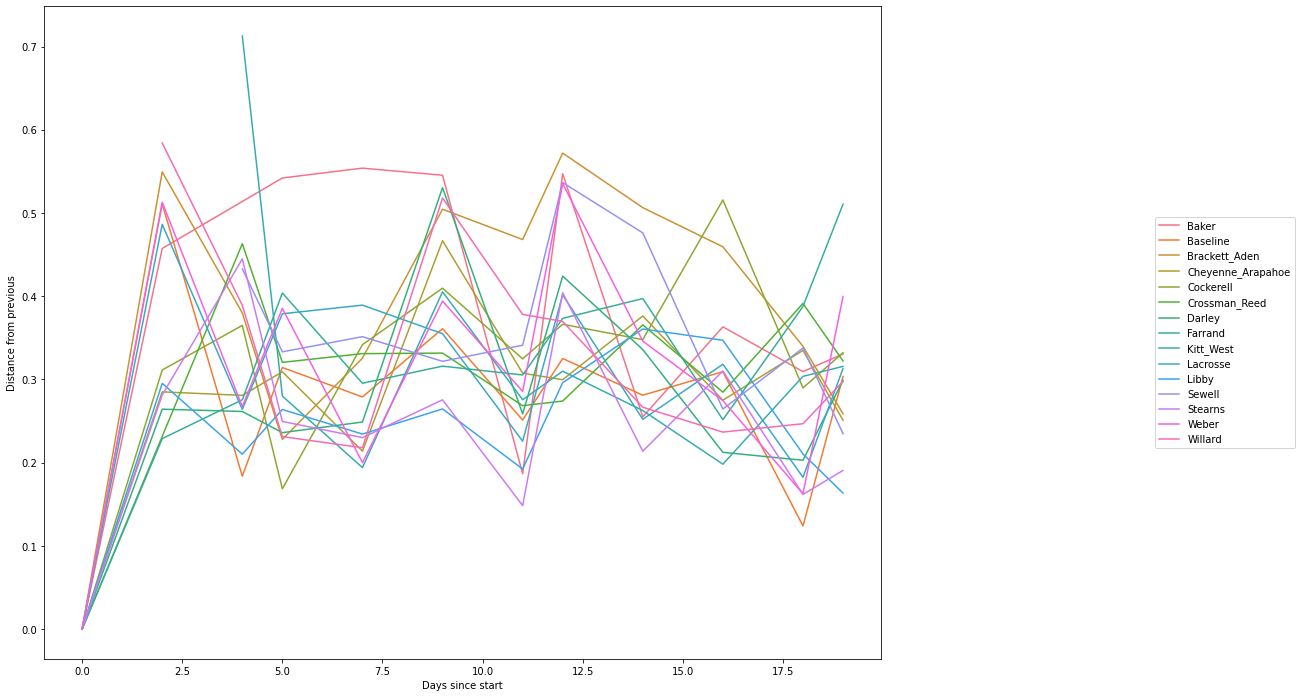

In [ ]:
sns.lineplot(x='Days since start',
             y='Distance from previous',
             hue='Location',
             data=distprev_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

Something weird is happening with that one that peaks up at day 4. I need to make sure all have a time point 0

In [ ]:
have_a_day_zero = [x for x in new_metadata[new_metadata['DaysSince']==0]['Location']]
all_locations = [x for x in new_metadata['Location'].unique()]

for loc in all_locations:
  if loc not in have_a_day_zero:
    print(f'{loc} has no day zero')

Kitt_West has no day zero
Sewell has no day zero
Willard has no day zero


In [ ]:
all_day_zeros = new_metadata[new_metadata['Location'].isin(['Kitt_West', 'Sewell', 'Willard'])==False]

In [ ]:
dist_prev_df = dist_from_prev(all_day_zeros)

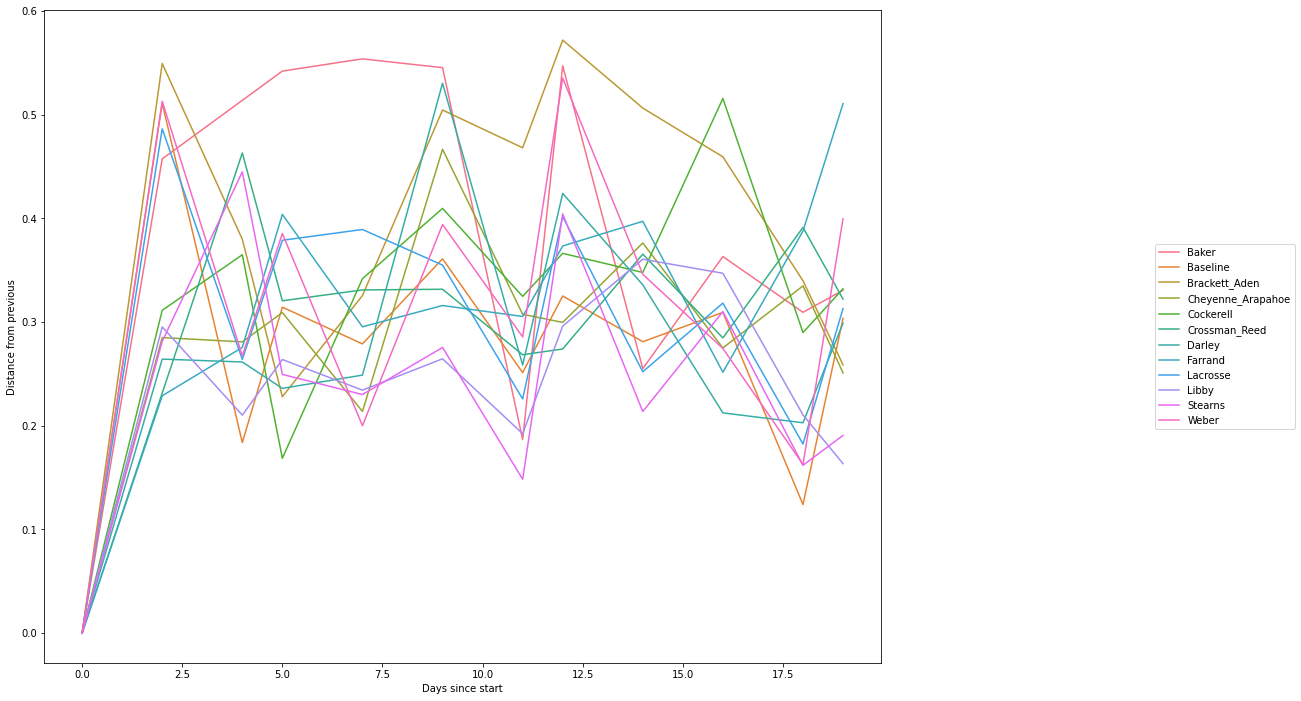

In [ ]:
sns.lineplot(x='Days since start',
             y='Distance from previous',
             hue='Location',
             data=dist_prev_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## From day 0 

In [ ]:
def dist_from_zero(metadata):
  distzero = []
  location = []
  dayssince = []
  index = []
  for num, row in enumerate(metadata.index):
    index.append(row)
    if metadata.loc[row]['DaysSince']==0:
      distzero.append(0)
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      zero = row

    else:
      current = row 
      distzero.append(braycurt_df[current][zero])
      location.append(str(metadata.loc[current]['Location']))
      dayssince.append(metadata.loc[current]['DaysSince'])

  distzero_df = pd.DataFrame(data = [distzero,location,dayssince]).transpose()
  distzero_df.columns = ['Distance from first', 'Location', 'Days since start']
  distzero_df.index = index
  
  #For some reason, these are dtype object, and I can't quite figure out why, 
  #but I have to convert them to strings before converting to floats...
  
  distzero_df['Distance from first'] = distzero_df['Distance from first'].astype(str).astype(float)
  distzero_df['Days since start'] = distzero_df['Days since start'].astype(str).astype(float)
  
  return distzero_df

In [ ]:
dist_from_zero_df = dist_from_zero(all_day_zeros)

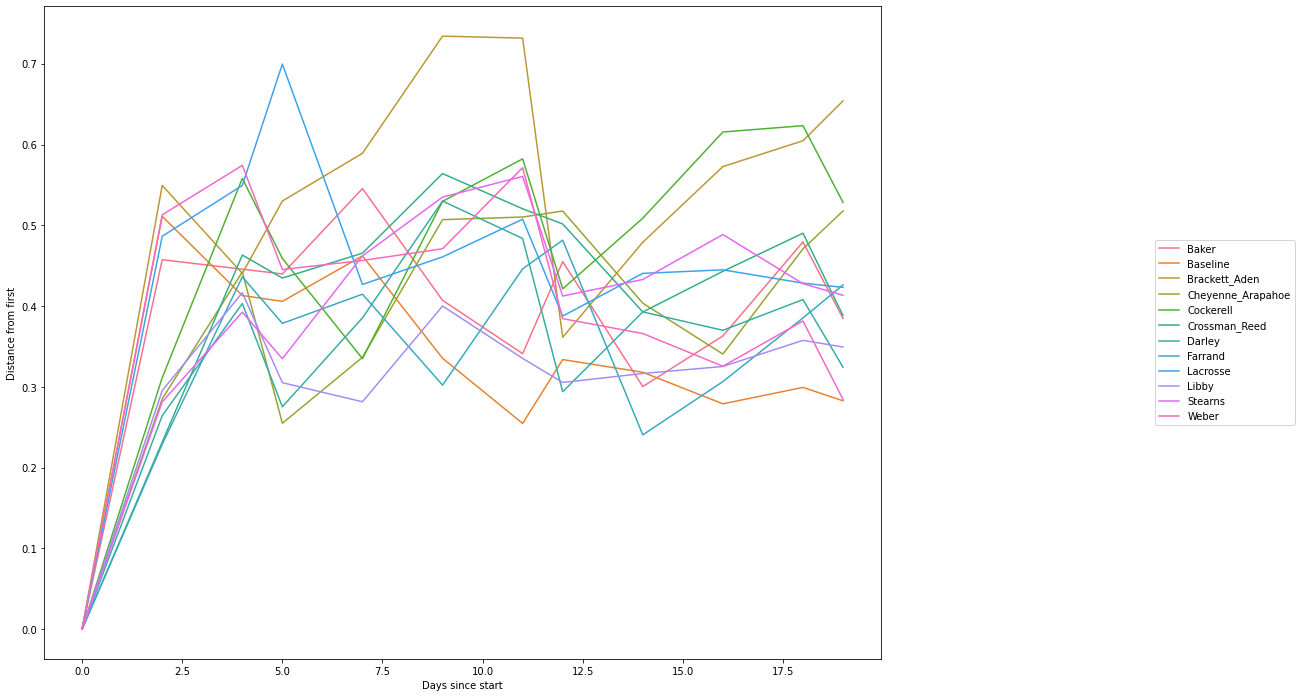

In [ ]:
sns.lineplot(x='Days since start',
             y='Distance from first',
             hue='Location',
             data=dist_from_zero_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## Average dist from previous timepoint

In [ ]:
avg_prev_dists = dist_prev_df.groupby(by='Days since start').mean()

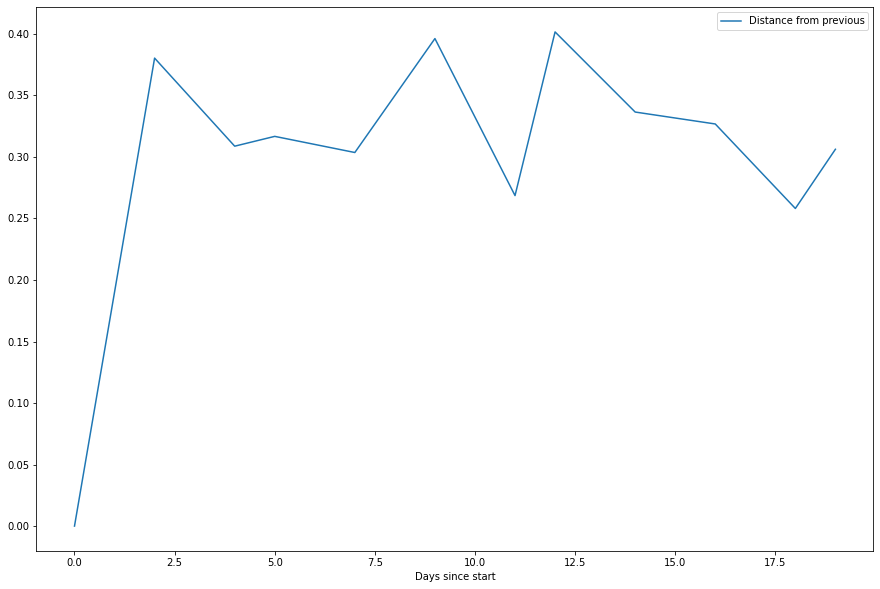

In [ ]:
avg_prev_dists.plot()
fig = plt.gcf()
fig.set_size_inches(15,10)

## Average dist from day 0  

In [ ]:
avg_dist_zero = dist_from_zero_df.groupby(by='Days since start').mean()

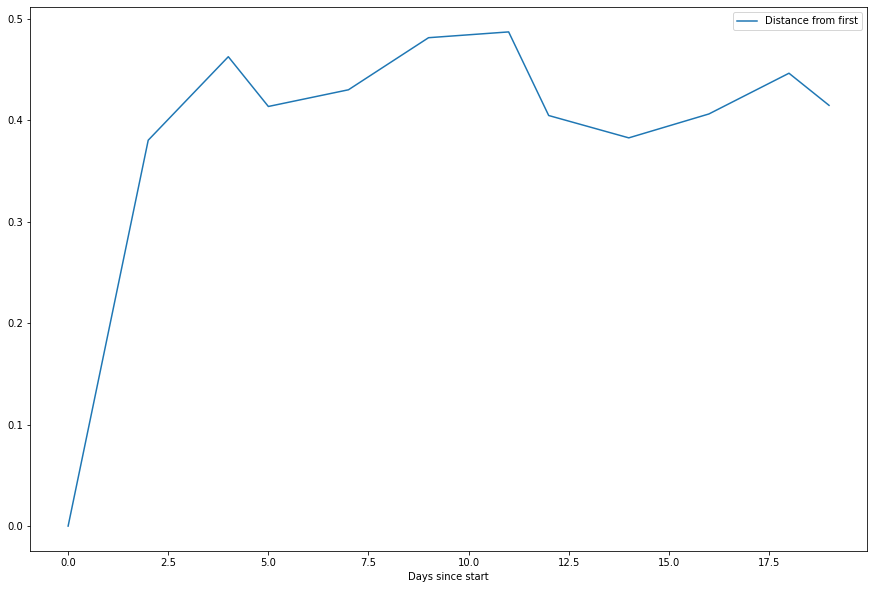

In [ ]:
avg_dist_zero.plot()
fig = plt.gcf()
fig.set_size_inches(15,10)

In [ ]:
avgs = avg_dist_zero.join(avg_prev_dists['Distance from previous'])

In [ ]:
avgs_w_precip = avgs.join(baker.groupby('DaysSince').mean()['Precip']).reset_index()

In [ ]:
melted = avgs_w_precip.melt(id_vars='Days since start')

In [ ]:
melted.head()

,Days since start,variable,value
0,0.0,Distance from first,0.000000
1,2.0,Distance from first,0.380330
2,4.0,Distance from first,0.462626
3,5.0,Distance from first,0.413584
4,7.0,Distance from first,0.430039


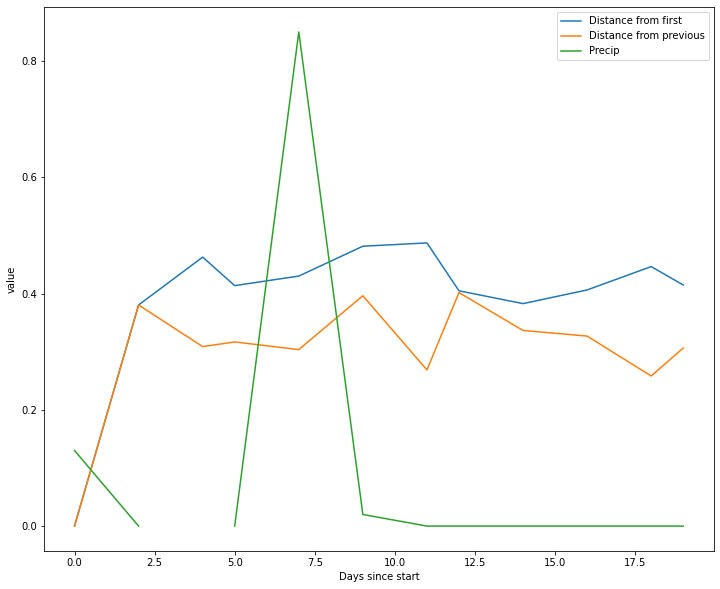

In [ ]:
sns.lineplot(x='Days since start',
             y='value',
             hue='variable',
             data=melted)
plt.legend(title='')
fig = plt.gcf()
fig.set_size_inches(12,10)

## Dist from average community

In [ ]:
data_notax.head()

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,0.127758982,0.064282262,0.0353633,0.021185758,0.019896891,0.002577735,0.031093926,0.020541324,0.034557757,0.041002094,0.013855325,0.01127759,0.003383277,0.023602384,0.007410988,0.015627517,0.034557757,0.006686,0.008860963,0.001127759,0.001047205,0.000966651,0.009827614,0.024005155,0.001449976,0.010149831,0.01433865,0.008780409,0,0.009908168,0,0.033027227,0.002416626,0.013694216,0.006363783,0.017238602,0.003786048,0.005638795,0.012969228,0.004913807,...,0,0,0,0,0,0,0.000161108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_10,0.06460396,0.09269802,0.036757426,0.009529703,0.073019802,0.094925743,0.022029703,0.053217822,0.013118812,0.011138614,0.00730198,0.006559406,0.036881188,0.004207921,0.008415842,0.031188119,0.021163366,0.004579208,0.004826733,0.005816832,0.009034653,0.002227723,0.008168317,0.016707921,0.002722772,0.00990099,0.015965347,0.015717822,0,0.004826733,0,0.004950495,0.001732673,0.005569307,0.003217822,0.006930693,0.007920792,0.004084158,0.00470297,0.002722772,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000123762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_12,0.077020639,0.065951804,0.02911334,0.00334371,0.060302087,0.076040586,0.014008993,0.043064684,0.018390407,0.00980053,0.004266113,0.004900265,0.026864983,0.005880318,0.006053269,0.05494062,0.023060071,0.004554364,0.004323763,0.002248357,0.008301626,0.000691802,0.008993428,0.026576732,0.004266113,0.008532226,0.017352704,0.010895884,0,0.005130866,0,0.013836043,0.002940159,0.017468004,0.004208463,0.008820477,0.008705177,0.004208463,0.008762827,0.003516661,...,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,5.76502E-05,0,0,0,0
BAK_13,0.058266972,0.125601198,0.035953639,0.0293306,0.000788457,0.018765276,0.009855712,0.018765276,0.097295593,0.118268548,0.032878656,0.025782544,0.002365371,0.062603485,0.004494205,0.000709611,0.010565324,0.003153828,0.023338327,0,0.004651896,0.000473074,0.05188047,0.003626902,0.000236537,0.001971142,0.003153828,0.011984546,7.88457E-05,0.013324923,0,0.003548056,0.000315383,0.001340377,0.008594181,0.005913427,0.004415359,0.009698021,0.002365371,0.004021131,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000157691,0,0,0,0
BAK_15,0.080519829,0.102224009,0.065648446,0.008038585,0.008038585,0.005359057,0.016747053,0.015139335,0.055332262,0.100348339,0.027063237,0.015273312,0.005493033,0.048499464,0.008306538,0.004153269,0.021168274,0.005894962,0.017416935,0.000401929,0,0.000937835,0.030144695,0.014067524,0.007368703,0.00710075,0.008172562,0.012593783,0,0.009914255,0,0.01085209,0.000669882,0.007904609,0.007636656,0.012057878,0.003349411,0.007770632,0.009512326,0.004287245,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000133976,0,0,0,0


In [ ]:
data_notax.shape[0]

173

In [ ]:
data_notax = data_notax.astype(str).astype(float)

In [ ]:
data_notax.mean(axis=0)

SampleID
NTU_1       0.091596
NTU_2       0.088081
NTU_4       0.071817
NTU_11      0.070798
NTU_14      0.062254
              ...   
NTU_702     0.000082
NTU_1842    0.000006
NTU_1123    0.000047
NTU_1161    0.000020
NTU_1557    0.000012
Length: 1087, dtype: float64

In [ ]:
data_notax.loc['Dummy'] = data_notax.mean(axis=0)

In [ ]:
data_notax.loc['Dummy']

SampleID
NTU_1       0.091596
NTU_2       0.088081
NTU_4       0.071817
NTU_11      0.070798
NTU_14      0.062254
              ...   
NTU_702     0.000082
NTU_1842    0.000006
NTU_1123    0.000047
NTU_1161    0.000020
NTU_1557    0.000012
Name: Dummy, Length: 1087, dtype: float64

In [ ]:
dummy_dm = diversity.beta_diversity('braycurtis', counts=data_notax, ids=data_notax.index)

In [ ]:
dummy_df = dummy_dm.to_data_frame()

In [ ]:
distdummy= []
location = []
dayssince = []
for row in metadata.index:
  distdummy.append(dummy_df[row]['Dummy'])
  location.append(metadata.loc[row]['Location'])
  dayssince.append(metadata.loc[row]['DaysSince'])

distdummy_df = pd.DataFrame(data = [distdummy,location,dayssince]).transpose()
distdummy_df.columns = ['Distance from average community', 'Location', 'Days Since']
distdummy_df['Distance from average community'] = distdummy_df['Distance from average community'].astype(str).astype(float)
distdummy_df['Days Since'] = distdummy_df['Days Since'].astype(str).astype(float)
distdummy_df['Location'] = distdummy_df['Location'].astype(str)
distdummy_df.index = metadata.index

In [ ]:
distdummy_df.head()

,Distance from average community,Location,Days Since
SampleID,,,
BAK_1,0.381526,Baker,0.0
BAK_10,0.315503,Baker,9.0
BAK_12,0.343412,Baker,11.0
BAK_13,0.464521,Baker,12.0
BAK_15,0.391341,Baker,14.0


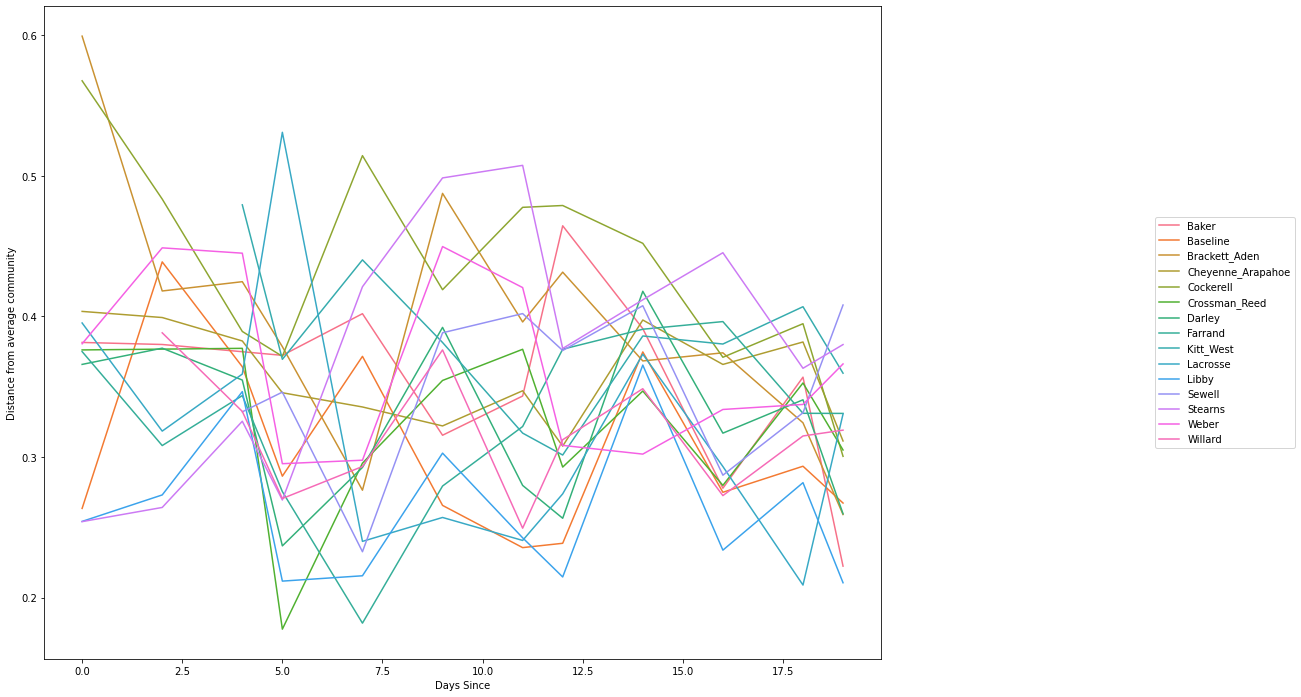

In [ ]:
sns.lineplot(x='Days Since',
             y='Distance from average community',
             hue='Location',
             data=distdummy_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

No handles with labels found to put in legend.


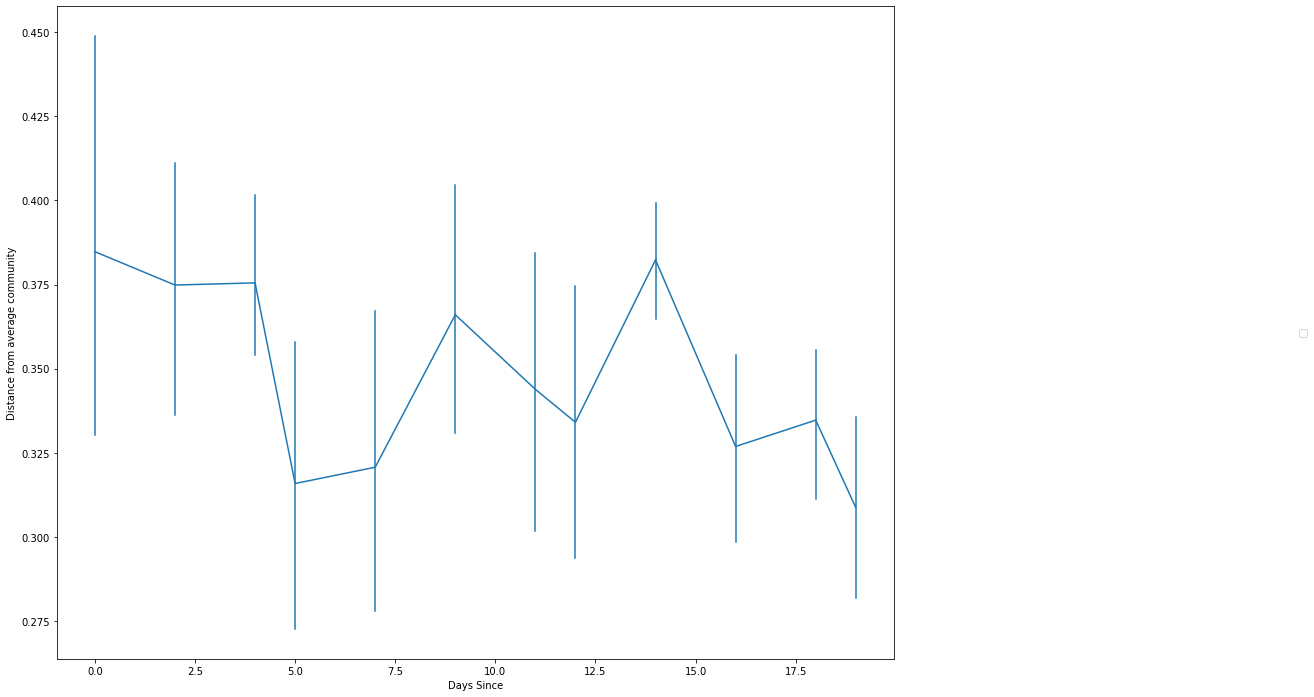

In [ ]:
sns.lineplot(x='Days Since',
             y='Distance from average community',
             data=distdummy_df,
             err_style='bars')

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## Putting it all together

In [ ]:
dist_from_zero_df.head()

,Distance from first,Location,Days since start
BAK_1,0.000000,Baker,0.0
BAK_3,0.457402,Baker,2.0
BAK_6,0.439809,Baker,5.0
BAK_8,0.545433,Baker,7.0
BAK_10,0.407111,Baker,9.0


In [ ]:
dist_prev_df.head()

,Distance from previous,Location,Days since start
BAK_1,0.000000,Baker,0.0
BAK_3,0.457402,Baker,2.0
BAK_6,0.542088,Baker,5.0
BAK_8,0.553894,Baker,7.0
BAK_10,0.545386,Baker,9.0


In [ ]:
alldists = pd.concat([distdummy_df, dist_from_zero_df['Distance from first'], dist_prev_df['Distance from previous'], metadata['Precip']], axis=1)

In [ ]:
alldists.head(20)

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00
BAK_17,0.277824,Baker,16.0,0.362968,0.363214,0.00
BAK_19,0.356827,Baker,18.0,0.479392,0.309436,0.00
BAK_20,0.222372,Baker,19.0,0.384711,0.330702,0.00
BAK_3,0.380069,Baker,2.0,0.457402,0.457402,0.00
BAK_6,0.372350,Baker,5.0,0.439809,0.542088,0.00


In [ ]:
melted_alldists = pd.melt(alldists, id_vars=['Location','Days Since'])

In [ ]:
melted_alldists.head()

,Location,Days Since,variable,value
0,Baker,0.0,Distance from average community,0.381526
1,Baker,9.0,Distance from average community,0.315503
2,Baker,11.0,Distance from average community,0.343412
3,Baker,12.0,Distance from average community,0.464521
4,Baker,14.0,Distance from average community,0.391341


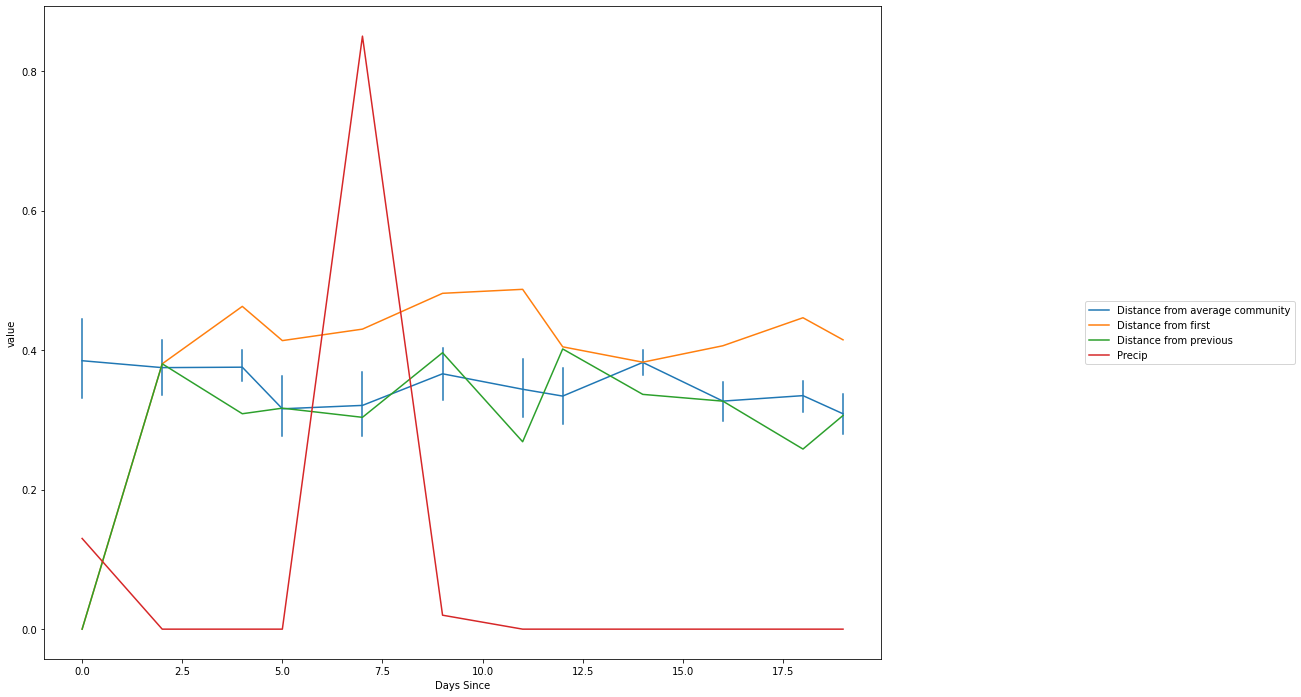

In [ ]:
sns.lineplot(x='Days Since',
             y ='value',
             hue='variable',
             data=melted_alldists,
             err_style ='bars')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

In [ ]:
melted_noprecip = melted_alldists = pd.melt(alldists.drop('Precip',axis=1),
                                            id_vars=['Location','Days Since'])

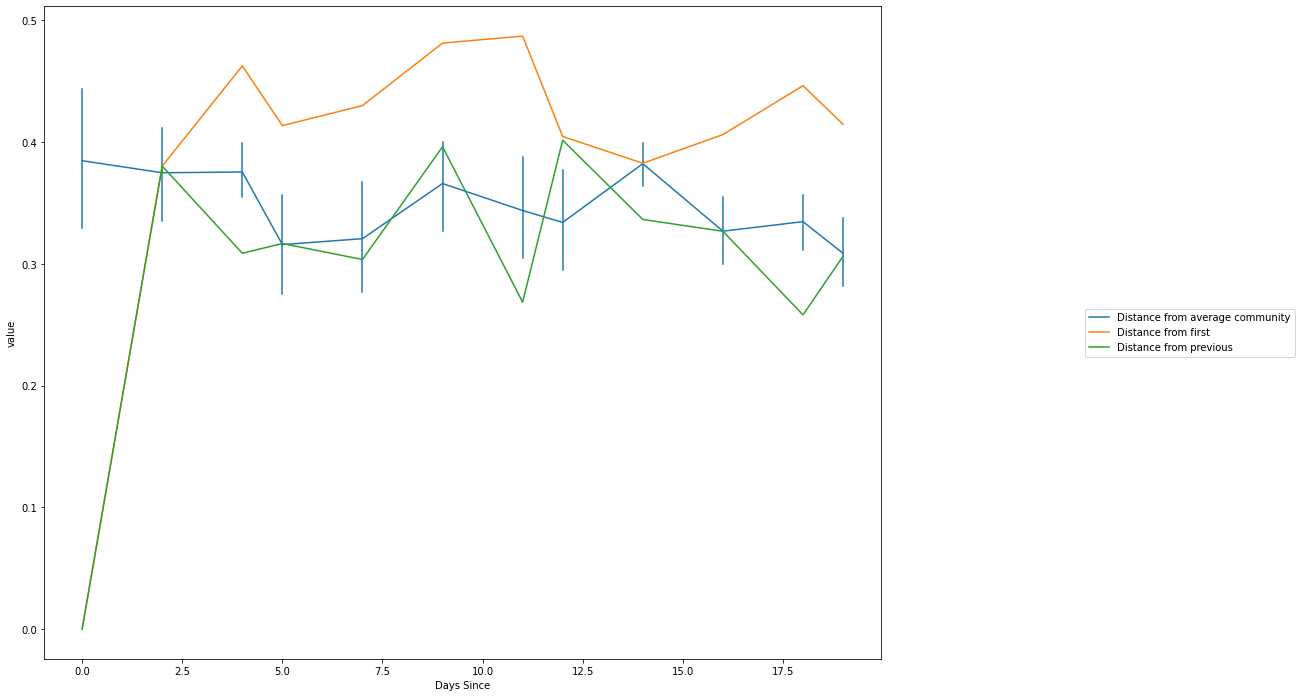

In [ ]:
sns.lineplot(x='Days Since',
             y ='value',
             hue='variable',
             data=melted_noprecip,
             estimator='mean',
             err_style ='bars')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

Exported these so Will could use them - commented out so I don't export the data again.

In [ ]:
#alldists.to_csv('alldists.csv')

In [ ]:
#melted_alldists.to_csv('melted_alldists.csv')

# Distance from dummy community for each site

Noah suggested this could be more useful than one average community.

In [ ]:
df = pd.DataFrame()

for location in metadata['Location'].unique():
  subset_metadata = metadata[metadata['Location']==location]
  subset_data = data_notax.loc[subset_metadata.index]
  subset_data.loc[f'{location}_avg'] = subset_data.mean(axis=0) 

  df = pd.concat([df, subset_data])

You can see below that we now have dummy for the individual sites

In [ ]:
df.iloc[:25,:10]

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3
SampleID,,,,,,,,,,
BAK_1,0.127759,0.064282,0.035363,0.021186,0.019897,0.002578,0.031094,0.020541,0.034558,0.041002
BAK_10,0.064604,0.092698,0.036757,0.009530,0.073020,0.094926,0.022030,0.053218,0.013119,0.011139
BAK_12,0.077021,0.065952,0.029113,0.003344,0.060302,0.076041,0.014009,0.043065,0.018390,0.009801
BAK_13,0.058267,0.125601,0.035954,0.029331,0.000788,0.018765,0.009856,0.018765,0.097296,0.118269
BAK_15,0.080520,0.102224,0.065648,0.008039,0.008039,0.005359,0.016747,0.015139,0.055332,0.100348
BAK_17,0.086337,0.070959,0.172994,0.008329,0.082332,0.020663,0.033477,0.047733,0.024027,0.015057
BAK_19,0.059213,0.051550,0.065134,0.002438,0.092999,0.014977,0.053292,0.090561,0.020202,0.017416
BAK_20,0.080319,0.106328,0.102482,0.015936,0.056232,0.071710,0.032237,0.067680,0.027475,0.013829
BAK_3,0.088166,0.027875,0.108340,0.001322,0.199552,0.009253,0.027933,0.043968,0.038853,0.050980


In [ ]:
site_dummies_bc_dm = diversity.beta_diversity('braycurtis',
                                              df,
                                              ids=df.index)
site_dummies_bc_df = site_dummies_bc_dm.to_data_frame()

In [ ]:
site_dummies_bc_df.head()

,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,Baker_avg,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,Baseline_avg,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,Brackett_Aden_avg,CHE_1,CHE_10,...,SEW_8,Sewell_avg,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,Stearns_avg,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,Weber_avg,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8,Willard_avg
BAK_1,0.000000,0.407111,0.341110,0.455063,0.300381,0.362968,0.479392,0.384711,0.457402,0.439809,0.545433,0.294771,0.429931,0.528565,0.455529,0.475913,0.453534,0.495222,0.509197,0.418251,0.663258,0.586920,0.505540,0.631647,0.481845,0.650140,0.545218,0.374385,0.606083,0.422815,0.586207,0.508202,0.451054,0.550958,0.623253,0.622672,0.475709,0.454173,0.445717,0.373194,...,0.451573,0.405406,0.416228,0.581428,0.608256,0.402173,0.406613,0.486379,0.457216,0.393887,0.397127,0.485583,0.408229,0.512184,0.398888,0.476160,0.594279,0.607914,0.477300,0.518552,0.546028,0.542841,0.470203,0.640467,0.664877,0.514040,0.560599,0.506014,0.476487,0.453799,0.445904,0.402789,0.357910,0.452371,0.468819,0.535074,0.489818,0.466368,0.464068,0.399024
BAK_10,0.407111,0.000000,0.186696,0.518187,0.423194,0.316260,0.393836,0.242089,0.488889,0.230865,0.545386,0.245109,0.436037,0.292144,0.331473,0.482339,0.535060,0.427422,0.407602,0.464188,0.540766,0.474314,0.480849,0.507613,0.389756,0.718514,0.371020,0.376738,0.492330,0.527333,0.499413,0.349585,0.274651,0.587528,0.533051,0.487825,0.407786,0.353771,0.532611,0.221816,...,0.435881,0.443143,0.363010,0.374218,0.373919,0.305798,0.365081,0.309754,0.269675,0.294517,0.424328,0.354186,0.287192,0.366624,0.248552,0.530353,0.409255,0.379806,0.459093,0.473334,0.425107,0.440104,0.536031,0.563015,0.526771,0.469229,0.468915,0.413646,0.257045,0.391326,0.456049,0.521021,0.407851,0.421206,0.433081,0.560911,0.520999,0.396255,0.517412,0.382978
BAK_12,0.341110,0.186696,0.000000,0.547214,0.410191,0.328624,0.440139,0.275147,0.501852,0.277325,0.579595,0.257837,0.437093,0.392894,0.371194,0.519220,0.551403,0.486606,0.468444,0.488498,0.580757,0.506977,0.515344,0.549467,0.442059,0.717248,0.381664,0.377839,0.531712,0.546437,0.536034,0.391367,0.278668,0.621253,0.565382,0.527142,0.436674,0.375951,0.541593,0.238200,...,0.448796,0.455619,0.389166,0.383331,0.397297,0.329744,0.359985,0.312824,0.294994,0.296044,0.459433,0.384024,0.323637,0.394120,0.266652,0.550243,0.453850,0.445368,0.509588,0.518893,0.478849,0.489905,0.573488,0.604798,0.567878,0.513984,0.496309,0.453911,0.296262,0.415687,0.486347,0.541515,0.426509,0.466876,0.458535,0.581493,0.546228,0.425329,0.541497,0.402938
BAK_13,0.455063,0.518187,0.547214,0.000000,0.255094,0.502857,0.544984,0.461719,0.492587,0.529534,0.504346,0.401528,0.514928,0.575796,0.508282,0.473726,0.528392,0.529352,0.526622,0.434525,0.703436,0.634195,0.523752,0.659947,0.507634,0.622258,0.650612,0.510079,0.644832,0.347758,0.660570,0.612434,0.588152,0.515417,0.646243,0.645507,0.581561,0.527378,0.319585,0.583767,...,0.529897,0.512819,0.539197,0.700034,0.721767,0.567100,0.622222,0.671775,0.604630,0.579610,0.488742,0.632092,0.565672,0.618627,0.570735,0.515719,0.683706,0.686110,0.433687,0.531602,0.602811,0.597146,0.427274,0.685315,0.701887,0.500561,0.579821,0.555539,0.631358,0.571790,0.530135,0.453672,0.514355,0.562330,0.537575,0.645872,0.550765,0.501603,0.497222,0.507424
BAK_15,0.300381,0.423194,0.410191,0.255094,0.000000,0.363214,0.485854,0.364916,0.425937,0.499613,0.498500,0.284845,0.445321,0.548563,0.485643,0.462496,0.501220,0.508688,0.517392,0.428496,0.674022,0.600408,0.499459,0.639307,0.470231,0.642063,0.598240,0.414430,0.629859,0.339367,0.610276,0.570837,0.496291,0.515928,0.623244,0.631498,0.544265,0.486696,0.303697,0.479155,...,0.490889,0.463266,0.452573,0.630336,0.653575,0.456412,0.481812,0.559007,0.506239,0.449313,0.434136,0.556766,0.503859,0.562634,0.476976

In [ ]:
dist_site_dummy = pd.DataFrame(columns=['Distance from site average'])

for sample in metadata.index:
  dist_site_dummy.loc[sample] = site_dummies_bc_df.loc[sample, f'{location}_avg']

In [ ]:
dist_site_dummy.head(15)

,Distance from site average
BAK_1,0.399024
BAK_10,0.382978
BAK_12,0.402938
BAK_13,0.507424
BAK_15,0.444256
BAK_17,0.292268
BAK_19,0.374182
BAK_20,0.277386
BAK_3,0.385975
BAK_6,0.422053


In [ ]:
trial_alldists = pd.concat([alldists, dist_site_dummy],axis=1)

In [ ]:
trial_alldists.head()

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip,Distance from site average
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13,0.399024
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02,0.382978
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00,0.402938
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00,0.507424
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00,0.444256


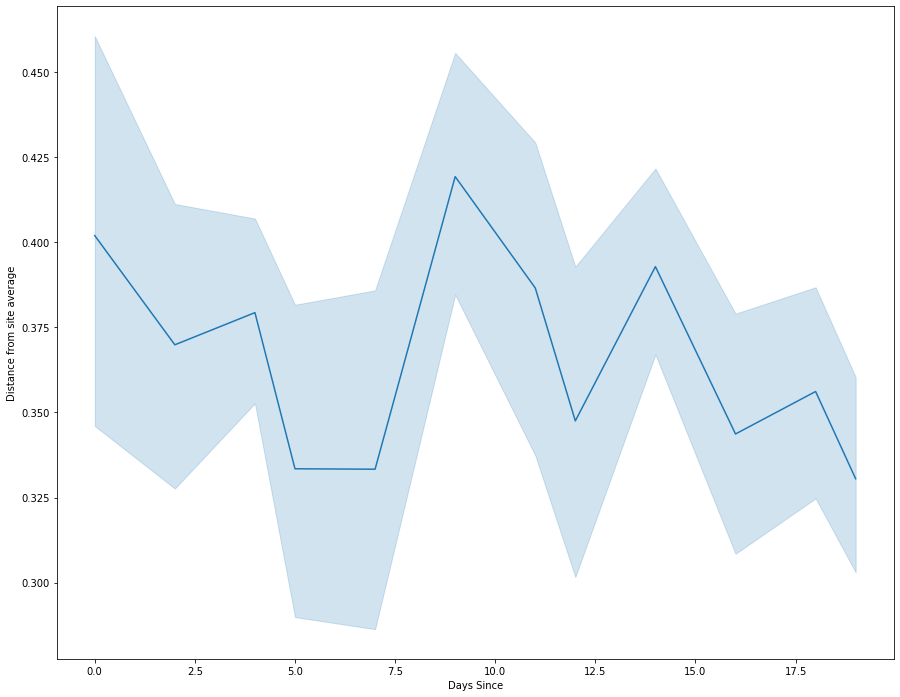

In [ ]:
sns.lineplot(x='Days Since',
             y='Distance from site average',
             data= trial_alldists)

fig = plt.gcf()
fig.set_size_inches(15,12)

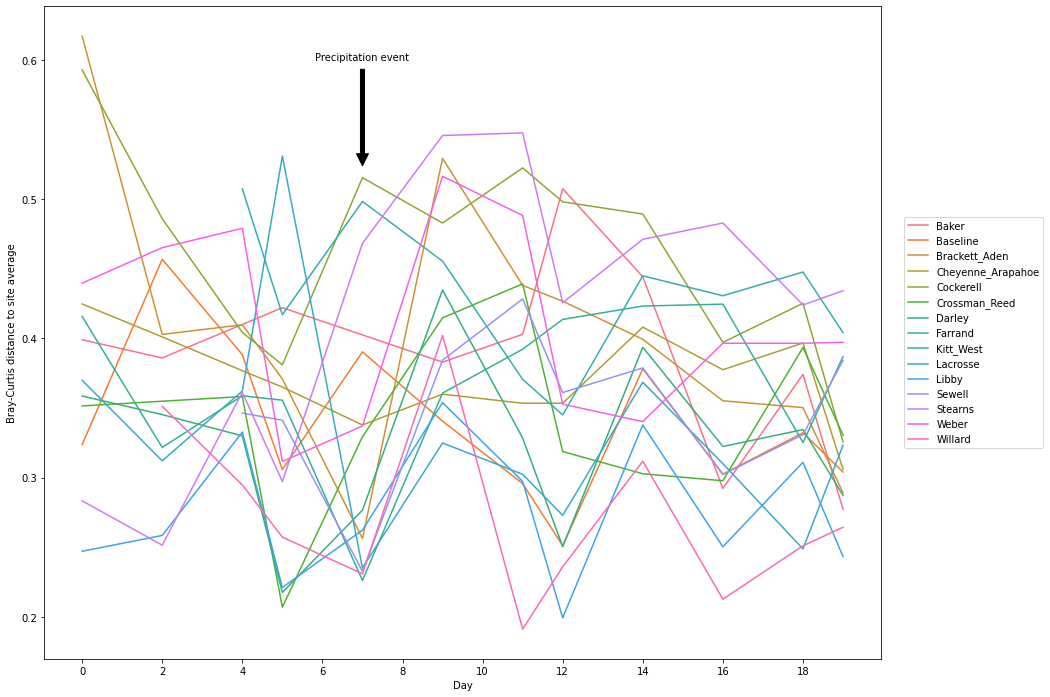

In [ ]:
ax = sns.lineplot(x='Days Since',
             y='Distance from site average',
             hue= 'Location',
             err_style='bars',
             data= trial_alldists)
plt.legend(bbox_to_anchor=(1.2, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)


ax.annotate('Precipitation event', xy=(7, 0.52), xytext=(7, 0.6), ha='center',
              arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylabel('Bray-Curtis distance to site average')
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0,20,2))

In [ ]:
melted_trialalldists = pd.melt(trial_alldists, id_vars=['Location','Days Since'])

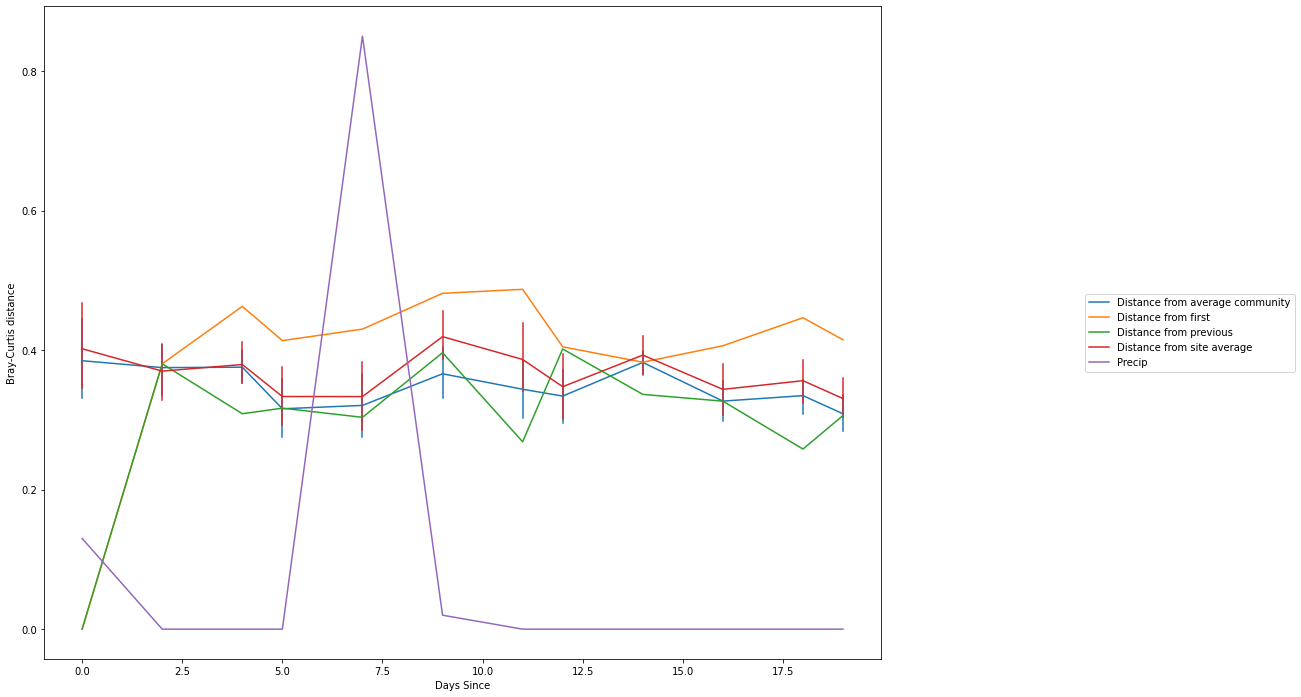

In [ ]:
ax = sns.lineplot(x='Days Since',
                  y='value',
                  hue='variable',
                  data=melted_trialalldists,
                  hue_order=['Distance from average community', 'Distance from first', 
                             'Distance from previous', 'Distance from site average', 'Precip'], 
                  err_style='bars')

ax.set_ylabel('Bray-Curtis distance')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)


#Which are most volatile?

In [ ]:
alldists2 = trial_alldists 

In [ ]:
alldists2.head()

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip,Distance from site average
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13,0.399024
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02,0.382978
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00,0.402938
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00,0.507424
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00,0.444256


In [ ]:
cols = ['Distance from average community','Distance from first', 
        'Distance from previous', 'Distance from site average']

avgdists = pd.DataFrame(columns=cols)
for location in alldists2['Location'].unique():
  subset = alldists2[alldists2['Location']==location]
  for col in cols:
    avgdists.loc[location, col] = subset[col].mean(axis=0)

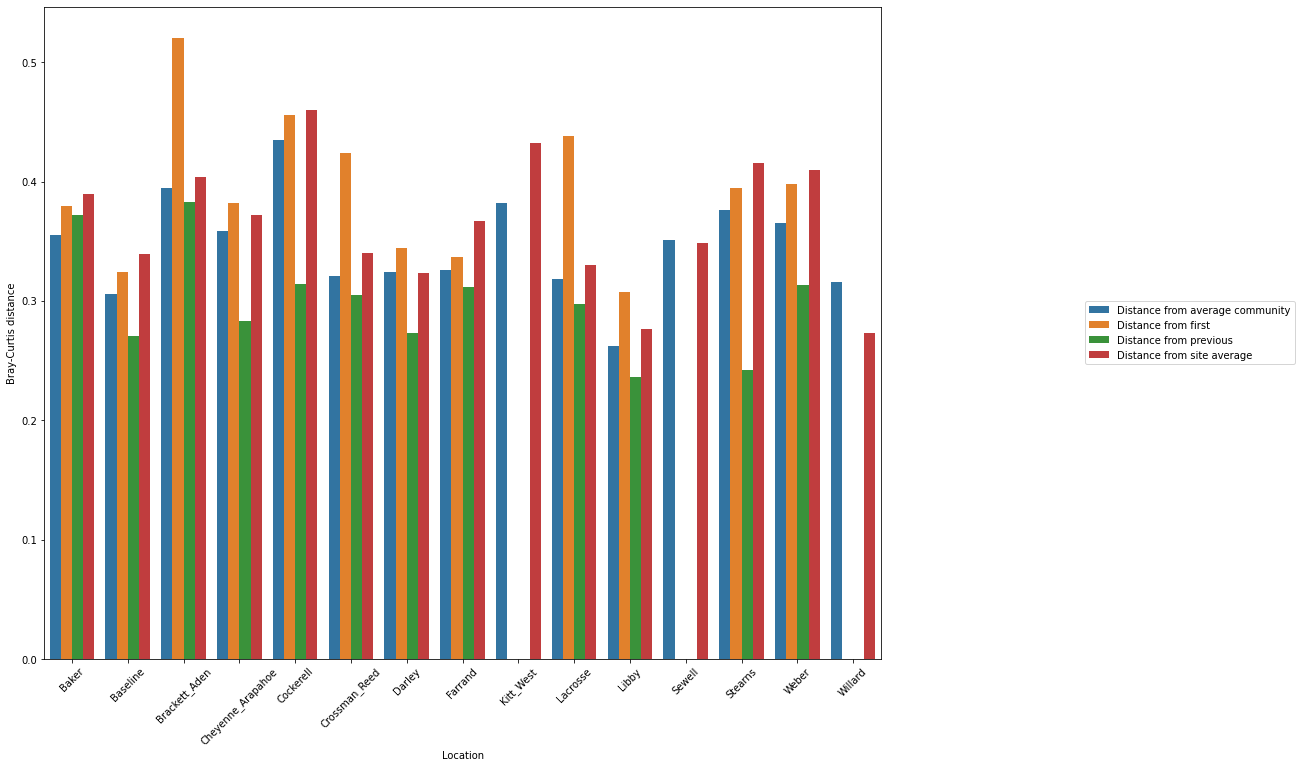

In [ ]:
ax = sns.barplot(x='index',
            y='value',
            data=pd.melt(avgdists.reset_index(), id_vars=['index']), 
            hue='variable')

ax.set_ylabel('Bray-Curtis distance')
ax.set_xlabel('Location')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)


In [ ]:
alldists2.head()

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip,Distance from site average
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13,0.399024
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02,0.382978
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00,0.402938
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00,0.507424
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00,0.444256


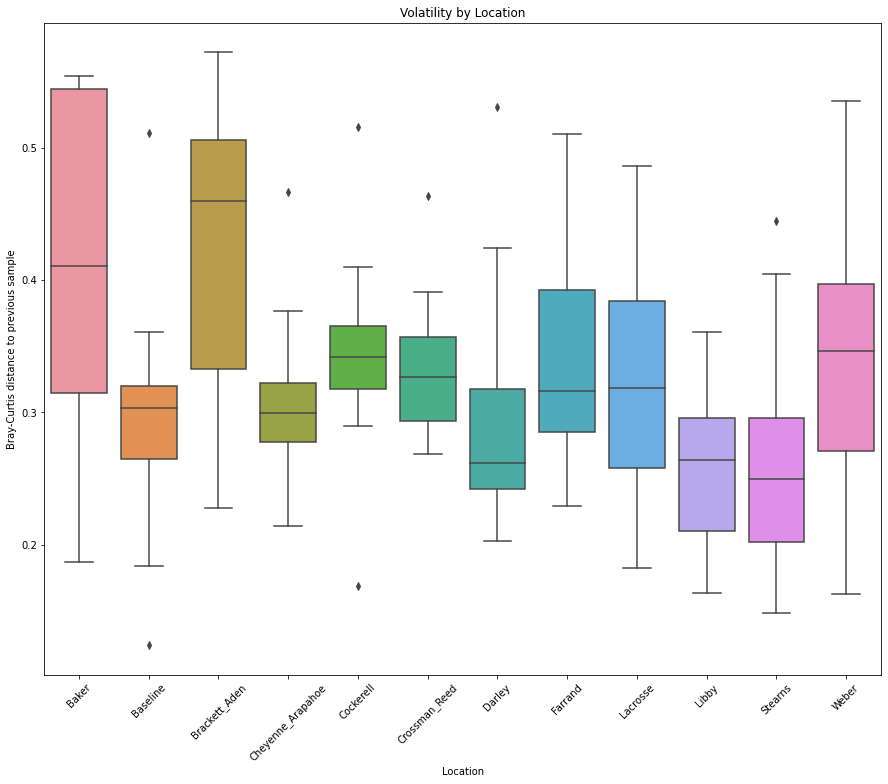

In [ ]:
ax = sns.boxplot(x='Location',
            y='Distance from previous',
            data=alldists2[alldists2['Days Since']!=0].dropna())

ax.set_ylabel('Bray-Curtis distance to previous sample')
ax.set_xlabel('Location')
ax.set_title('Volatility by Location')
for item in ax.get_xticklabels():
    item.set_rotation(45)
fig = plt.gcf()
fig.set_size_inches(15,12)


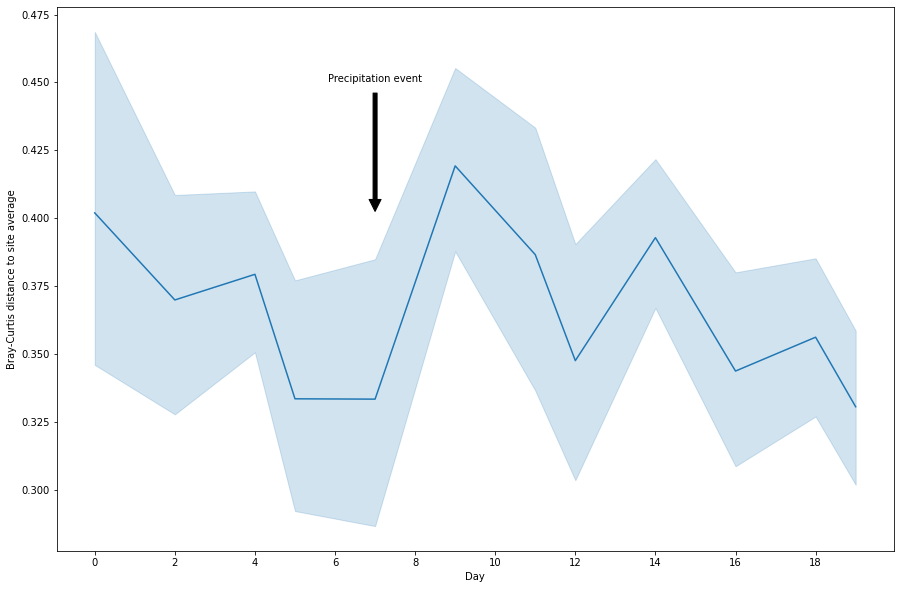

In [ ]:
ax = sns.lineplot(x='Days Since',
             y='Distance from site average',
             data=alldists2)

ax.annotate('Precipitation event', xy=(7, 0.4), xytext=(7, 0.45), ha='center',
              arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylabel('Bray-Curtis distance to site average')
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0,20,2))

fig = plt.gcf()
fig.set_size_inches(15,10)

#Post-precipitation event changes

I'm wanting to identify taxa that are increased/decreased after the precipitation event. I think a reliable way to start is to use ancom. Since ANCOM uses pairwise log-ratios, I'll need to address the zeros in the data. Multiplicative replacement should be a good solution.

##Grouping by taxonomy

In [ ]:
data.head()

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,0.127759,0.0642823,0.0353633,0.0211858,0.0198969,0.00257773,0.0310939,0.0205413,0.0345578,0.0410021,0.0138553,0.0112776,0.00338328,0.0236024,0.00741099,0.0156275,0.0345578,0.006686,0.00886096,0.00112776,0.00104721,0.000966651,0.00982761,0.0240052,0.00144998,0.0101498,0.0143386,0.00878041,0,0.00990817,0,0.0330272,0.00241663,0.0136942,0.00636378,0.0172386,0.00378605,0.0056388,0.0129692,0.00491381,...,0,0,0,0,0,0,0.000161108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_10,0.064604,0.092698,0.0367574,0.0095297,0.0730198,0.0949257,0.0220297,0.0532178,0.0131188,0.0111386,0.00730198,0.00655941,0.0368812,0.00420792,0.00841584,0.0311881,0.0211634,0.00457921,0.00482673,0.00581683,0.00903465,0.00222772,0.00816832,0.0167079,0.00272277,0.00990099,0.0159653,0.0157178,0,0.00482673,0,0.0049505,0.00173267,0.00556931,0.00321782,0.00693069,0.00792079,0.00408416,0.00470297,0.00272277,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000123762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_12,0.0770206,0.0659518,0.0291133,0.00334371,0.0603021,0.0760406,0.014009,0.0430647,0.0183904,0.00980053,0.00426611,0.00490027,0.026865,0.00588032,0.00605327,0.0549406,0.0230601,0.00455436,0.00432376,0.00224836,0.00830163,0.000691802,0.00899343,0.0265767,0.00426611,0.00853223,0.0173527,0.0108959,0,0.00513087,0,0.013836,0.00294016,0.017468,0.00420846,0.00882048,0.00870518,0.00420846,0.00876283,0.00351666,...,0,0,0,0,0,5.76502e-05,0,0,0,0,0,0,5.76502e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.76502e-05,0,0,0,0,0,5.76502e-05,0,0,0,0
BAK_13,0.058267,0.125601,0.0359536,0.0293306,0.000788457,0.0187653,0.00985571,0.0187653,0.0972956,0.118269,0.0328787,0.0257825,0.00236537,0.0626035,0.00449421,0.000709611,0.0105653,0.00315383,0.0233383,0,0.0046519,0.000473074,0.0518805,0.0036269,0.000236537,0.00197114,0.00315383,0.0119845,7.88457e-05,0.0133249,0,0.00354806,0.000315383,0.00134038,0.00859418,0.00591343,0.00441536,0.00969802,0.00236537,0.00402113,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000157691,0,0,0,0
BAK_15,0.0805198,0.102224,0.0656484,0.00803858,0.00803858,0.00535906,0.0167471,0.0151393,0.0553323,0.100348,0.0270632,0.0152733,0.00549303,0.0484995,0.00830654,0.00415327,0.0211683,0.00589496,0.0174169,0.000401929,0,0.000937835,0.0301447,0.0140675,0.0073687,0.00710075,0.00817256,0.0125938,0,0.00991426,0,0.0108521,0.000669882,0.00790461,0.00763666,0.0120579,0.00334941,0.00777063,0.00951233,0.00428725,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000133976,0,0,0,0


In [ ]:
data_tax = data

In [ ]:
data.loc['taxonomy']

SampleID
NTU_1       Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
NTU_2       Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
NTU_4       Bacteria;Proteobacteria;Gammaproteobacteria;En...
NTU_11      Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
NTU_14      Bacteria;Campylobacterota;Campylobacteria;Camp...
                                  ...                        
NTU_702     Archaea;Euryarchaeota;Methanobacteria;Methanob...
NTU_1842    Archaea;Halobacterota;Methanomicrobia;Methanom...
NTU_1123    Archaea;Halobacterota;Methanomicrobia;Methanom...
NTU_1161    Archaea;Halobacterota;Methanosarcinia;Methanos...
NTU_1557    Archaea;Halobacterota;Methanosarcinia;Methanos...
Name: taxonomy, Length: 1087, dtype: object

In [ ]:
data_tax.dtypes

SampleID
NTU_1       object
NTU_2       object
NTU_4       object
NTU_11      object
NTU_14      object
             ...  
NTU_702     object
NTU_1842    object
NTU_1123    object
NTU_1161    object
NTU_1557    object
Length: 1087, dtype: object

In [ ]:
ranks = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']
for i in range(len(ranks)):
  data_tax.loc[ranks[i]] = [tax.split(';')[i] for tax in data_tax.loc['taxonomy']]

In [ ]:
data_tax.iloc[-8:]

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WIL_8,0.095172213,0.040559237,0.193329935,0.094516857,0.078060147,0.015801354,0.038156266,0.016165441,0.046384621,0.030437632,0.026869584,0.024320979,0.00349523,0.024976334,0.011286682,0,0.006407923,0.010995413,0.012597393,0.010340057,0.00458749,0.003640865,0.004077769,0.002111702,0.001966067,0.002402971,0.00080099,0.001456346,0.01456346,0.004223403,7.28173E-05,0.001601981,0.00538848,0.001820433,0.003058327,0.004223403,0.00189325,0.004660307,0.001601981,0.002402971,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.28173E-05,0,0,0,0,0,0,0,0,0,0,0,0
taxonomy,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,Bacteria;Campylobacterota;Campylobacteria;Camp...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Proteobacteria;Gammaproteobacteria;NA...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Campylobacterota;Campylobacteria;Camp...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Bacteroidota;Bacteroidia;Flavobacteri...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Firmicutes;Negativicutes;Veillonellal...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Negativicutes;Acidaminococ...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Actinobacteriota;Actinobacteria;Bifid...,Bacteria;Proteobacteria;Gammaproteobacteria;Xa...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Bacteroidota;Bacteroidia;Chitinophaga...,Bacteria;Bacteroidota;Bacteroidia;Flavobacteri...,Bacteria;Calditrichota;Calditrichia;Calditrich...,Bacteria;Campylobacterota;Campylobacteria;Camp...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Firmicutes;Clostridia;Peptostreptococ...,Bacteria;Firmicutes;Clostridia;Peptostreptococ...,Bacteria;Firmicutes;Incertae_Sedis;Gelria;uncu...,Bacteria;Firmicutes;Moorellia;Desulfitibactera...,Bacteria;Fusobacteriota;Fusobacteriia;Fusobact...,Ba

For some reason the relative abundances are not registering as floats. I'll convert them here

In [ ]:
data_tax.iloc[:-7] = data_tax.iloc[:-7].astype(float)

In [ ]:
data_tax.iloc[-10:]

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WIL_5,0.0879639,0.0317998,0.227578,0.0278829,0.106619,0.0140078,0.0404302,0.0169953,0.0319989,0.0233021,0.0226383,0.0218416,0.00624046,0.0222399,0.0112195,0.000995818,0.00624046,0.00969262,0.0098254,0.0117506,0.00351856,0.00570935,0.00458076,0.00238996,0.00643962,0.00464715,0.00179247,0.00252274,0.00471354,0.00471354,0,0.00185886,0.00604129,0.00252274,0.00245635,0.00398327,0.000863042,0.00338578,0.00451437,0.00126137,...,0,0,0,0,6.63878e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.63878e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WIL_6,0.063638,0.0275804,0.211152,0.0642947,0.0697869,0.0576682,0.0207152,0.0234613,0.0344457,0.0294311,0.0149245,0.0226852,0.027282,0.0167154,0.00650707,0.00835771,0.00943227,0.00501463,0.0109844,0.00417886,0.0103277,0.00191033,0.00782043,0.0056713,0.00214912,0.00364157,0.00483553,0.00244762,0.00244762,0.00477583,0,0.00316399,0.00459674,0.00238792,0.00483553,0.00346248,0.0029849,0.00531312,0.00358188,0.00244762,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WIL_8,0.0951722,0.0405592,0.19333,0.0945169,0.0780601,0.0158014,0.0381563,0.0161654,0.0463846,0.0304376,0.0268696,0.024321,0.00349523,0.0249763,0.0112867,0,0.00640792,0.0109954,0.0125974,0.0103401,0.00458749,0.00364087,0.00407777,0.0021117,0.00196607,0.00240297,0.00080099,0.00145635,0.0145635,0.0042234,7.28173e-05,0.00160198,0.00538848,0.00182043,0.00305833,0.0042234,0.00189325,0.00466031,0.00160198,0.00240297,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.28173e-05,0,0,0,0,0,0,0,0,0,0,0,0
taxonomy,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,Bacteria;Campylobacterota;Campylobacteria;Camp...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Ps...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Proteobacteria;Gammaproteobacteria;NA...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Campylobacterota;Campylobacteria;Camp...,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,Bacteria;Bacteroidota;Bacteroidia;Flavobacteri...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Firmicutes;Clostridia;Oscillospirales...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Firmicutes;Clostridia;Lachnospirales;...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Proteobacteria;Gammaproteobacteria;En...,Bacteria;Firmicutes;Negativicutes;Veillonellal...,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...,Bacteria;Firmicutes;Negativicutes;Acidaminococ...,Bacteria;Proteobacteria;Gammaproteoba

I'm having trouble grouping by values for a row (even after changing the axis=), so I'll just transpose and go by column.




In [ ]:
data_tax_t = data_tax.transpose()

In [ ]:
for i in ranks:
  locals()[f'by_{i}'] = data_tax_t.groupby(i).sum().transpose().iloc[:-6]

the .iloc[:-6] is to remove taxonomy string rows

Below I double check that the taxonomy isn't present at the bottom of the table

In [ ]:
by_class.iloc[-6:]

class,ABY1,Acidobacteriae,Actinobacteria,Alphaproteobacteria,Anaerolineae,BD2-11_terrestrial_group,BRH-c20a,Babeliae,Bacilli,Bacteroidia,Bdellovibrionia,Caldatribacteriia,Caldisericia,Calditrichia,Campylobacteria,Chlamydiae,Cloacimonadia,Clostridia,Coriobacteriia,Desulfitobacteriia,Desulfobacteria,Desulfobulbia,Desulfotomaculia,Desulfovibrionia,Desulfuromonadia,Dojkabacteria,Elusimicrobia,Endomicrobia,Fibrobacteria,Fusobacteriia,Gammaproteobacteria,Gemmatimonadetes,Gracilibacteria,Halanaerobiia,Holophagae,Hydrogenedentia,Ignavibacteria,Incertae_Sedis,JS1,Kapabacteria,Kiritimatiellae,Latescibacteria,Lentisphaeria,Leptospirae,MVP-15,Methanobacteria,Methanomicrobia,Methanosarcinia,Microgenomatia,Moorellia,Myxococcia,NA,Negativicutes,Nitrospiria,Oligoflexia,Omnitrophia,Parcubacteria,Phycisphaerae,Planctomycetes,Polyangia,Saccharimonadia,Spirochaetia,Sumerlaeia,Synergistia,Syntrophia,Syntrophobacteria,Syntrophomonadia,Syntrophorhabdia,Thermoanaerobacteria,Thermodesulfovibrionia,Thermoleophilia,V2072-189E03,Vampirivibrionia,Verrucomicrobiae,Vicinamibacteria,Zetaproteobacteria,vadinHA49
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WIL_19,0,0,0.00722767,0.0082602,0,0,0,0,0.0557563,0.0725349,0.000258131,0,0.000129066,0,0.110222,0,0,0.0970573,0.00232318,0,0.000129066,0,0,0.00206505,0,0,0,0.000387197,0,0.00722767,0.620805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00206505,0.00903459,0.000129066,0,0,0,0,0.000129066,0,0.000258132,0,0,0,0,0.00180692,0,0,0,0,0,0,0.000129066,0.00206505,0,0,0
WIL_20,0,0,0.00655817,0.00801554,0,0,0,0,0.0213748,0.0944863,0.000728686,0,0.000242895,0,0.0296332,0,0,0.104202,0.000485791,0,0,0,0,0.000485791,0,0,0,0,0,0.00704396,0.699053,0,0.000242895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00242895,0.0145737,0,0,0,0,0,0.000971581,0,0.000971582,0.000242895,0,0,0,0.00170027,0,0,0,0,0,0,0,0.00655817,0,0,0
WIL_3,0,0,0.000586778,0.00123875,0,0,0,0,0.00293389,0.0493545,0,0,0.000456383,0,0.0646108,0,0,0.00371626,6.51975e-05,0,0,0,0,0.00026079,0,0,0,0.000130395,0,0.000195593,0.8728,0,0.000782371,6.51975e-05,0,0.00026079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000586777,0.000782371,0,0,0,0,0,0.000456383,0.000195593,0,0,0,0,0,0.000195593,0,0,0,6.51975e-05,0,0,0,0.00026079,0,0,0
WIL_5,0,0,0.00537742,0.00238996,0,0,0,0,0.032862,0.0397663,0,0,0.000199164,6.63878e-05,0.128859,0,6.63878e-05,0.085242,0.000597491,0,0,0,0,0.00119498,0,0,6.63878e-05,0,0,0.00537741,0.683596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00238996,0.00936069,0,0,0,0,0,6.63878e-05,0,6.63878e-05,0,0,6.63878e-05,0,0.000398327,0,0,0,0,6.63878e-05,0,0,0.00192525,0,0,0
WIL_6,0,0,0.00543251,0.00232822,5.96979e-05,0,0,0,0.0300281,0.116232,0,0,0.000656677,0,0.0798161,5.96979e-05,0,0.0809504,0.00226852,5.96979e-05,0,5.96979e-05,0.000119396,0.000776073,0,0,0.000119396,0.00029849,0,0.00226852,0.663065,0,0.000179094,0,5.96979e-05,0,0,0,0,0,0,0,0,0,5.96979e-05,0,0,0,0,0,0,0.00149245,0.0107456,5.96979e-05,0,0,5.96979e-05,0,0,5.96979e-05,0.000477584,0,0,5.96979e-05,0,0.000417885,0,0,0.000119396,0.000238792,5.96979e-05,0,0,0.00131335,0,0,0
WIL_8,0,0,0.00677201,0.00269424,0,0,0,0,0.017549,0.0388116,7.28173e-05,0,0.000582538,0,0.0937887,0,0,0.0296366,0.00283987,0,0,0,0,0.000582538,0,0,7.28173e-05,0.000218452,0,0.0120149,0.778854,0,0.000728173,7.28173e-05,0,0,0,0,0.000145635,0,0,0,0,0,0,0,0,0,0,0,0,0.00116508,0.00917498,0.000145635,0,0,0,0,0,0.000218452,0.000436905,0,0,7.28173e-05,0,0.00116508,0,0,7.28173e-05,0.000218452,0,0,0,0.00189325,0,0,0


Exported them to the group's drive, commented out to not do it again when runtime restarts

In [ ]:
#for i in ranks:
#  locals()[f'by_{i}'].to_csv(f'by_{i}.csv')

##Metadata column adding

Just to make sure, let's double check when this was:

In [ ]:
metadata[metadata['Precip']==metadata['Precip'].max()]['DaysSince']

SampleID
BAK_8    7
BAS_8    7
BRA_8    7
CHE_8    7
COC_8    7
CRR_8    7
DAR_8    7
FAR_8    7
KWC_8    7
LAC_8    7
LIB_8    7
SEW_8    7
STE_8    7
WEB_8    7
WIL_8    7
Name: DaysSince, dtype: int64

And we see the spike in beta diversity at day 9, so I'll call day 9 post-precip

In [ ]:
metadata['DaysSince'].dtype

dtype('int64')

In [ ]:
metadata['post-precip'] = metadata['DaysSince']==9

In [ ]:
metadata['post-precip']

SampleID
BAK_1     False
BAK_10     True
BAK_12    False
BAK_13    False
BAK_15    False
          ...  
WIL_20    False
WIL_3     False
WIL_5     False
WIL_6     False
WIL_8     False
Name: post-precip, Length: 173, dtype: bool

Great, this is now a boolean series

##ANCOM time

###Phylum level

In [ ]:
phylum_pseudo = by_phylum.apply(lambda x: x+0.00001)

In [ ]:
phylum_pseudo

phylum,Acidobacteriota,Actinobacteriota,Armatimonadota,Bacteroidota,Bdellovibrionota,Caldatribacteriota,Caldisericota,Calditrichota,Campylobacterota,Chloroflexi,Cloacimonadota,Cyanobacteria,Dependentiae,Desulfobacterota,Elusimicrobiota,Euryarchaeota,Fibrobacterota,Firmicutes,Fusobacteriota,Gemmatimonadota,Halanaerobiaeota,Halobacterota,Hydrogenedentes,Latescibacterota,Myxococcota,Nitrospirota,Patescibacteria,Planctomycetota,Proteobacteria,SAR324_clade,Spirochaetota,Sumerlaeota,Sva0485,Synergistota,Verrucomicrobiota,WPS-2
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,1e-05,0.0385955,1e-05,0.0139459,1e-05,0.000171108,9.05542e-05,1e-05,0.0228068,1e-05,9.05542e-05,1e-05,1e-05,0.00822653,0.000251662,1e-05,1e-05,0.318602,0.000896096,9.05542e-05,0.000171108,1e-05,9.05542e-05,1e-05,0.000171108,1e-05,0.000573879,0.000251662,0.58282,1e-05,9.05542e-05,1e-05,1e-05,9.05542e-05,0.0121737,1e-05
BAK_10,1e-05,0.014614,1e-05,0.18652,0.000133762,0.000133762,1e-05,1e-05,0.0856536,1e-05,0.000257525,1e-05,1e-05,0.00545555,0.00050505,1e-05,1e-05,0.227857,0.000752574,0.000133762,0.000133762,1e-05,1e-05,1e-05,0.000257525,1e-05,0.000505048,0.000257525,0.474639,1e-05,1e-05,1e-05,1e-05,1e-05,0.00236148,1e-05
BAK_12,6.76502e-05,0.0204758,1e-05,0.139005,1e-05,0.0002406,0.000586502,1e-05,0.067576,1e-05,0.0001253,6.76502e-05,1e-05,0.00663977,0.00110535,6.76502e-05,1e-05,0.328847,0.000471201,0.0001253,0.000182951,1e-05,1e-05,1e-05,1e-05,1e-05,0.000759451,0.000240601,0.428697,1e-05,0.0001253,1e-05,1e-05,0.0001253,0.00456436,0.0001253
BAK_13,8.88457e-05,0.0111272,1e-05,0.0411675,1e-05,1e-05,1e-05,1e-05,0.000877303,1e-05,8.88457e-05,1e-05,1e-05,0.00686957,1e-05,0.000167691,1e-05,0.0716019,8.88457e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,0.000246537,0.000483074,0.000246537,0.86337,1e-05,1e-05,1e-05,1e-05,1e-05,0.00371575,1e-05
BAK_15,1e-05,0.0242597,1e-05,0.0163551,0.000143976,1e-05,0.000143976,1e-05,0.00979028,1e-05,1e-05,1e-05,1e-05,0.00657484,0.000143976,0.000143976,1e-05,0.193204,1e-05,0.000411929,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,0.00134976,0.000277953,0.744249,1e-05,1e-05,1e-05,1e-05,1e-05,0.00309146,1e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIL_20,1e-05,0.00705396,1e-05,0.0944963,0.000738686,1e-05,0.000252895,1e-05,0.0296432,1e-05,1e-05,1e-05,1e-05,0.00268185,1e-05,1e-05,1e-05,0.141861,0.00705396,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,0.00122448,0.000981581,0.707078,1e-05,0.000252895,1e-05,0.000252895,1e-05,0.00656817,1e-05
WIL_3,1e-05,0.000661975,1e-05,0.0493645,1e-05,1e-05,0.000466383,1e-05,0.0646208,1e-05,1e-05,1e-05,1e-05,0.000466383,0.000140395,1e-05,1e-05,0.00750772,0.000205593,1e-05,7.51975e-05,1e-05,0.00027079,1e-05,0.000205593,7.51975e-05,0.000792371,0.000466383,0.87457,1e-05,1e-05,1e-05,1e-05,1e-05,0.00027079,1e-05
WIL_5,1e-05,0.00605129,1e-05,0.0397763,1e-05,1e-05,0.000209164,7.63878e-05,0.128869,1e-05,7.63878e-05,1e-05,1e-05,0.0022008,0.000275552,1e-05,1e-05,0.128736,0.00538741,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,7.63878e-05,7.63878e-05,0.686327,1e-05,1e-05,1e-05,1e-05,7.63878e-05,0.00193525,1e-05


In [ ]:
phyl_pseud_precip = pd.concat([phylum_pseudo,metadata['post-precip']],axis=1)

In [ ]:
phyl_pseud_precip.head()

,Acidobacteriota,Actinobacteriota,Armatimonadota,Bacteroidota,Bdellovibrionota,Caldatribacteriota,Caldisericota,Calditrichota,Campylobacterota,Chloroflexi,Cloacimonadota,Cyanobacteria,Dependentiae,Desulfobacterota,Elusimicrobiota,Euryarchaeota,Fibrobacterota,Firmicutes,Fusobacteriota,Gemmatimonadota,Halanaerobiaeota,Halobacterota,Hydrogenedentes,Latescibacterota,Myxococcota,Nitrospirota,Patescibacteria,Planctomycetota,Proteobacteria,SAR324_clade,Spirochaetota,Sumerlaeota,Sva0485,Synergistota,Verrucomicrobiota,WPS-2,post-precip
BAK_1,1e-05,0.0385955,1e-05,0.0139459,1e-05,0.000171108,9.05542e-05,1e-05,0.0228068,1e-05,9.05542e-05,1e-05,1e-05,0.00822653,0.000251662,1e-05,1e-05,0.318602,0.000896096,9.05542e-05,0.000171108,1e-05,9.05542e-05,1e-05,0.000171108,1e-05,0.000573879,0.000251662,0.58282,1e-05,9.05542e-05,1e-05,1e-05,9.05542e-05,0.0121737,1e-05,False
BAK_10,1e-05,0.014614,1e-05,0.18652,0.000133762,0.000133762,1e-05,1e-05,0.0856536,1e-05,0.000257525,1e-05,1e-05,0.00545555,0.00050505,1e-05,1e-05,0.227857,0.000752574,0.000133762,0.000133762,1e-05,1e-05,1e-05,0.000257525,1e-05,0.000505048,0.000257525,0.474639,1e-05,1e-05,1e-05,1e-05,1e-05,0.00236148,1e-05,True
BAK_12,6.76502e-05,0.0204758,1e-05,0.139005,1e-05,0.0002406,0.000586502,1e-05,0.067576,1e-05,0.0001253,6.76502e-05,1e-05,0.00663977,0.00110535,6.76502e-05,1e-05,0.328847,0.000471201,0.0001253,0.000182951,1e-05,1e-05,1e-05,1e-05,1e-05,0.000759451,0.000240601,0.428697,1e-05,0.0001253,1e-05,1e-05,0.0001253,0.00456436,0.0001253,False
BAK_13,8.88457e-05,0.0111272,1e-05,0.0411675,1e-05,1e-05,1e-05,1e-05,0.000877303,1e-05,8.88457e-05,1e-05,1e-05,0.00686957,1e-05,0.000167691,1e-05,0.0716019,8.88457e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,0.000246537,0.000483074,0.000246537,0.86337,1e-05,1e-05,1e-05,1e-05,1e-05,0.00371575,1e-05,False
BAK_15,1e-05,0.0242597,1e-05,0.0163551,0.000143976,1e-05,0.000143976,1e-05,0.00979028,1e-05,1e-05,1e-05,1e-05,0.00657484,0.000143976,0.000143976,1e-05,0.193204,1e-05,0.000411929,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,0.00134976,0.000277953,0.744249,1e-05,1e-05,1e-05,1e-05,1e-05,0.00309146,1e-05,False


I am not sure why this data keeps turning into dtype object but here I go again converting the type

In [ ]:
phyl_pseud_precip.iloc[:,:-1] = phyl_pseud_precip.iloc[:,:-1].astype(float)

In [ ]:
from skbio.stats.composition import ancom

In [ ]:
ancom_df, percentile_df = ancom(table=phyl_pseud_precip.drop('post-precip',axis=1),
                                grouping=phyl_pseud_precip['post-precip'].astype(str))

In [ ]:
ancom_df.shape

(36, 2)

In [ ]:
ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Bacteroidota,15,True


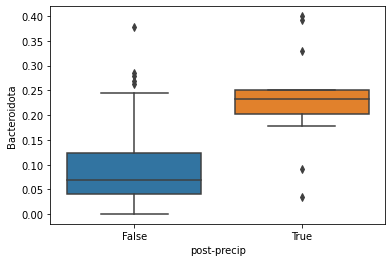

In [ ]:
sns.boxplot(x='post-precip',
            y='Bacteroidota',
            data=phyl_pseud_precip)

###Class Level

In [ ]:
class_pseudo = by_class.apply(lambda x: x+0.00001)

In [ ]:
class_pseudo.dtypes

class
ABY1                   object
Acidobacteriae         object
Actinobacteria         object
Alphaproteobacteria    object
Anaerolineae           object
                        ...  
Vampirivibrionia       object
Verrucomicrobiae       object
Vicinamibacteria       object
Zetaproteobacteria     object
vadinHA49              object
Length: 77, dtype: object

In [ ]:
class_pseudo = class_pseudo.astype(float)

class_pseud_precip = pd.concat([class_pseudo,metadata['post-precip']],axis=1)

ancom_df, percentile_df = ancom(table=class_pseud_precip.drop('post-precip',axis=1),
                                grouping=class_pseud_precip['post-precip'].astype(str))

In [ ]:
ancom_df.shape

(77, 2)

In [ ]:
ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Parcubacteria,57,True


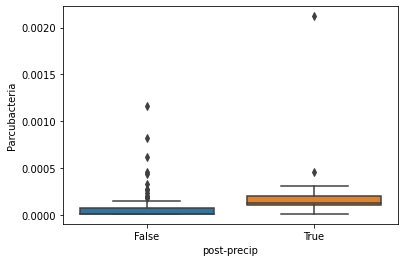

In [ ]:
sns.boxplot(x='post-precip',
            y='Parcubacteria',
            data=class_pseud_precip)

###Order Level

In [ ]:
order_pseudo = by_order.apply(lambda x: x+0.00001).astype(float)

order_pseud_precip = pd.concat([order_pseudo,metadata['post-precip']],axis=1)

ancom_df, percentile_df = ancom(table=order_pseud_precip.drop('post-precip',axis=1),
                                grouping=order_pseud_precip['post-precip'].astype(str))

In [ ]:
ancom_df.shape

(153, 2)

In [ ]:
ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Bacteroidales,70,True


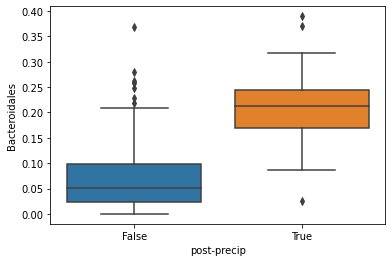

In [ ]:
sns.boxplot(x='post-precip',
            y='Bacteroidales',
            data=order_pseud_precip)

###Family Level

In [ ]:
family_pseudo = by_family.apply(lambda x: x+0.00001).astype(float)

family_pseud_precip = pd.concat([family_pseudo,metadata['post-precip']],axis=1)

ancom_df, percentile_df = ancom(table=family_pseud_precip.drop('post-precip',axis=1),
                                grouping=family_pseud_precip['post-precip'].astype(str))

In [ ]:
ancom_df.shape

(272, 2)

In [ ]:
ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Erwiniaceae,240,True
Marinifilaceae,239,True


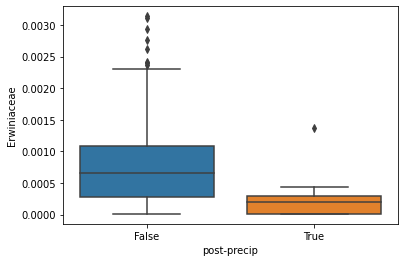

In [ ]:
sns.boxplot(x='post-precip',
            y='Erwiniaceae',
            data=family_pseud_precip)

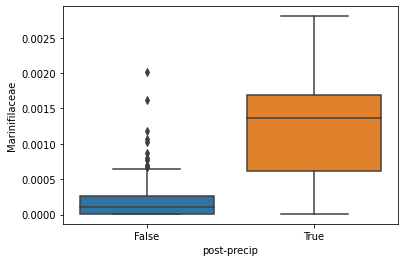

In [ ]:
sns.boxplot(x='post-precip',
            y='Marinifilaceae',
            data=family_pseud_precip)

###Genus Level

In [ ]:
genus_pseudo = by_genus.apply(lambda x: x+0.00001).astype(float)

genus_pseud_precip = pd.concat([genus_pseudo,metadata['post-precip']],axis=1)

ancom_df, percentile_df = ancom(table=genus_pseud_precip.drop('post-precip',axis=1),
                                grouping=genus_pseud_precip['post-precip'].astype(str))

In [ ]:
ancom_df.shape

(727, 2)

In [ ]:
ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Odoribacter,623,True


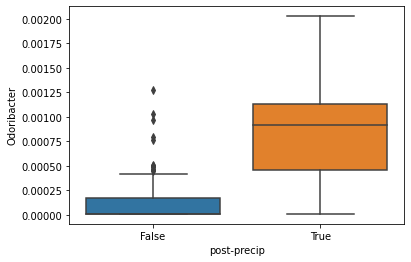

In [ ]:
sns.boxplot(x='post-precip',
            y='Odoribacter',
            data=genus_pseud_precip)

#SARS ANCOM

In [ ]:
ranks

['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

In [ ]:
phyl_pseud_SARS = pd.concat([phyl_pseud_precip, metadata['SARS_CoV_2_detectable']],axis=1).drop('post-precip',axis=1)

ancom_df, percentile_df = ancom(table=phyl_pseud_SARS.drop('SARS_CoV_2_detectable',axis=1),
                                grouping=phyl_pseud_SARS['SARS_CoV_2_detectable'].astype(str))

ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Fusobacteriota,18,True


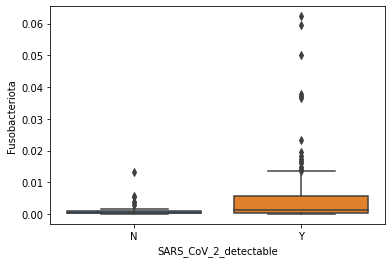

In [ ]:
sns.boxplot(x='SARS_CoV_2_detectable',
            y='Fusobacteriota',
            data=phyl_pseud_SARS)

In [ ]:
class_pseud_SARS = pd.concat([class_pseud_precip, metadata['SARS_CoV_2_detectable']],axis=1).drop('post-precip',axis=1)

ancom_df, percentile_df = ancom(table=class_pseud_SARS.drop('SARS_CoV_2_detectable',axis=1),
                                grouping=class_pseud_SARS['SARS_CoV_2_detectable'].astype(str))

ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Saccharimonadia,51,True


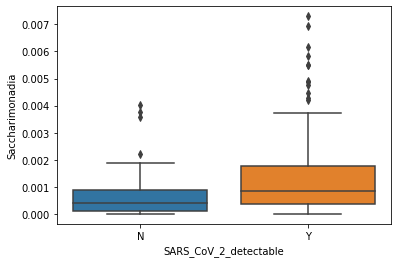

In [ ]:
sns.boxplot(x='SARS_CoV_2_detectable',
            y='Saccharimonadia',
            data=class_pseud_SARS)

In [ ]:
order_pseud_SARS = pd.concat([order_pseud_precip, metadata['SARS_CoV_2_detectable']],axis=1).drop('post-precip',axis=1)

ancom_df, percentile_df = ancom(table=order_pseud_SARS.drop('SARS_CoV_2_detectable',axis=1),
                                grouping=order_pseud_SARS['SARS_CoV_2_detectable'].astype(str))

ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Saccharimonadales,63,True
uncultured bacterium,55,True


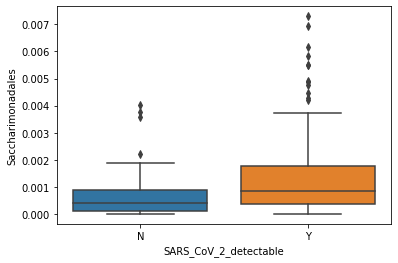

In [ ]:
sns.boxplot(x='SARS_CoV_2_detectable',
            y='Saccharimonadales',
            data=order_pseud_SARS)

In [ ]:
family_pseud_SARS = pd.concat([family_pseud_precip, metadata['SARS_CoV_2_detectable']],axis=1).drop('post-precip',axis=1)

ancom_df, percentile_df = ancom(table=family_pseud_SARS.drop('SARS_CoV_2_detectable',axis=1),
                                grouping=family_pseud_SARS['SARS_CoV_2_detectable'].astype(str))

ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Leptotrichiaceae,117,True


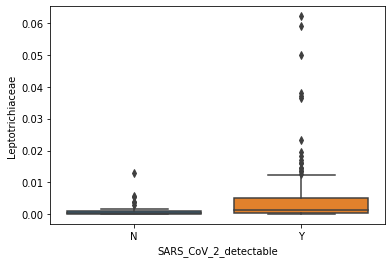

In [ ]:
sns.boxplot(x='SARS_CoV_2_detectable',
            y='Leptotrichiaceae',
            data=family_pseud_SARS)

In [ ]:
genus_pseud_SARS = pd.concat([genus_pseud_precip, metadata['SARS_CoV_2_detectable']],axis=1).drop('post-precip',axis=1)

ancom_df, percentile_df = ancom(table=genus_pseud_SARS.drop('SARS_CoV_2_detectable',axis=1),
                                grouping=genus_pseud_SARS['SARS_CoV_2_detectable'].astype(str))

ancom_df[ancom_df['Reject null hypothesis']==True]

,W,Reject null hypothesis
Abiotrophia,2,True
Acetanaerobacterium,1,True
Acetitomaculum,0,True
Acetoanaerobium,0,True
Acetobacter,1,True
...,...,...
dgA-11_gut_group,0,True
furcosa_group,0,True
mle1-7,0,True
uncultured,0,True


In [ ]:
ancom_df.sort_values('W',
                     ascending=False)

,W,Reject null hypothesis
Sebaldella,114,True
Zoogloea,34,True
Pedobacter,32,True
Uruburuella,31,True
Alicycliphilus,29,True
...,...,...
Gordonibacter,0,True
Granulicatella,0,True
HN-HF0106,0,True
HT002,0,True


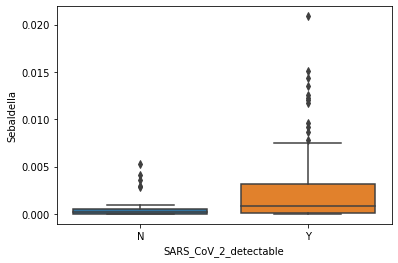

In [ ]:
sns.boxplot(x='SARS_CoV_2_detectable',
            y='Sebaldella',
            data=genus_pseud_SARS)

#Looking at Archaea

Per request from Sarah, data in table form looked a little interesting

In [ ]:
kingdom_days = pd.concat([metadata[['DaysSince','Location']],by_kingdom],
                         axis=1)

In [ ]:
kingdom_days['Archaea'] = kingdom_days['Archaea'].astype(float)

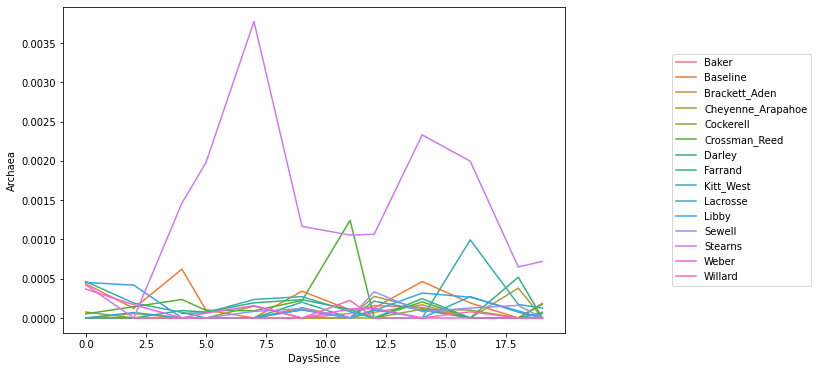

In [ ]:
sns.lineplot(x='DaysSince',
             y='Archaea',
             hue='Location',
             data=kingdom_days)
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(9,6)